<a href="https://colab.research.google.com/github/AnitaTasnim/Mentorness-ML-internship/blob/main/worldcup2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
# Load dataset from Google Drive
file_path = "/content/drive/MyDrive/mentorness/Machine Learning /CWC23_all_innings.csv"
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset loaded successfully.")
print(dataset.head())

Dataset loaded successfully.
  team                     player bat_or_bowl  bb_bf  runs  wkts  \
0  PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1  ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2   NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3   NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4  AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   

   wicketball_prob  runs_per_ball      opposition     ground start_date  \
0             0.05       0.750000  v South Africa    Chennai  27-Oct-23   
1             0.05       0.750000         v India    Lucknow  29-Oct-23   
2             0.05       0.800000       v England  Ahmedabad   5-Oct-23   
3             0.05       0.816667    v Bangladesh    Chennai  13-Oct-23   
4             0.05       0.816667      v Pakistan    Chennai  23-Oct-23   

   overs  mdns  econ  inns  4s  6s  sr  not_out  mins  
0   10.0   0.0   4.5     2 NaN NaN NaN      NaN   NaN  

In [4]:
dataset.head()


,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


In [5]:
df=dataset

In [6]:
df.nunique()

team                10
player             152
bat_or_bowl          2
bb_bf              117
runs               128
wkts                 7
wicketball_prob    129
runs_per_ball      645
opposition          10
ground              10
start_date          41
overs               38
mdns                 4
econ               230
inns                 2
4s                  20
6s                  12
sr                 429
not_out              2
mins               156
dtype: int64

#Team Performance

Team Performance Analysis using Machine Learning techniques, considering the provided columns:

- team
- runs
- wkts
- runs_per_ball
- econ

We will focus on clustering the teams based on these metrics to identify top-performing teams and their strengths.

In [7]:

# Select relevant columns for team performance analysis
team_df = df.groupby('team').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'runs_per_ball': 'mean',
    'econ': 'mean'
}).reset_index()

# Display the first few rows of the processed data
print(team_df.head())


  team  runs  wkts  runs_per_ball      econ
0  AFG  4134  53.0       0.855123  5.763818
1  AUS  5234  77.0       0.890978  5.661129
2  BAN  4358  51.0       0.840755  6.095769
3  ENG  4396  65.0       0.935399  6.068302
4  IND  4783  94.0       0.920735  4.963793


In [9]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           10 non-null     object 
 1   runs           10 non-null     int64  
 2   wkts           10 non-null     float64
 3   runs_per_ball  10 non-null     float64
 4   econ           10 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 528.0+ bytes


In [11]:
!pip install scikit-learn
import sklearn.preprocessing

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(team_df[['runs', 'wkts', 'runs_per_ball', 'econ']])

# Create a new DataFrame with scaled features
team_scaled_df = pd.DataFrame(scaled_features, columns=['runs', 'wkts', 'runs_per_ball', 'econ'])
team_scaled_df['team'] = team_df['team']

# Display the first few rows of the scaled data
print(team_scaled_df.head())


       runs      wkts  runs_per_ball      econ team
0 -1.309260 -1.027671      -0.743052 -0.438630  AFG
1  1.329410  0.650159      -0.142036 -0.675956  AUS
2 -0.771931 -1.167490      -0.983907  0.328544  BAN
3 -0.680777 -0.188756       0.602576  0.265064  ENG
4  0.247555  1.838621       0.356759 -2.287573  IND


**Applying KMeans Clustering**

Apply KMeans clustering to identify top-performing team

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


  team  cluster
0  AFG        1
1  AUS        0
2  BAN        1
3  ENG        2
4  IND        0
5  NED        1
6   NZ        2
7  PAK        2
8   SA        0
9   SL        1


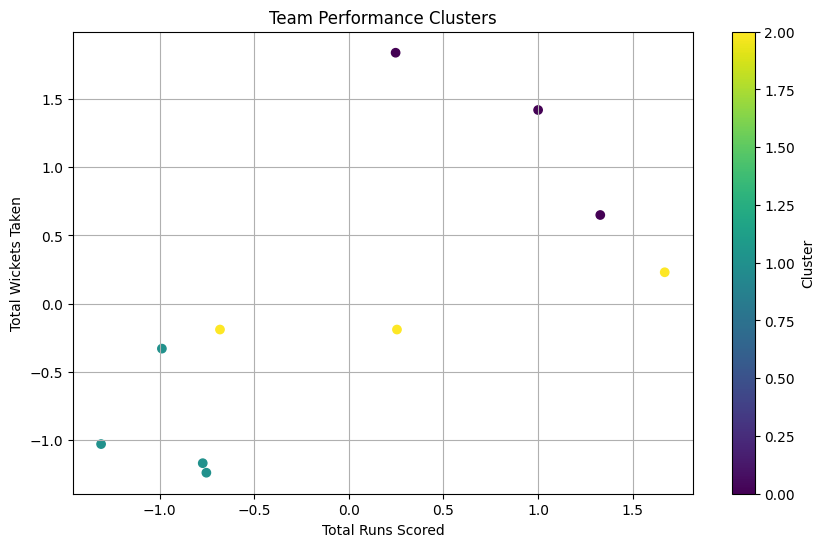

In [16]:
# Choose the number of clusters (you can experiment with different values)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
team_scaled_df['cluster'] = kmeans.fit_predict(team_scaled_df[['runs', 'wkts', 'runs_per_ball', 'econ']])

# Display the clusters
print(team_scaled_df[['team', 'cluster']])

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(team_scaled_df['runs'], team_scaled_df['wkts'], c=team_scaled_df['cluster'], cmap='viridis')
plt.xlabel('Total Runs Scored')
plt.ylabel('Total Wickets Taken')
plt.title('Team Performance Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [17]:
# Choose the number of clusters (you can experiment with different values)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
team_scaled_df['cluster'] = kmeans.fit_predict(team_scaled_df[['runs', 'wkts', 'runs_per_ball', 'econ']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
# Display the clusters
print(team_scaled_df[['team', 'cluster']])


  team  cluster
0  AFG        1
1  AUS        0
2  BAN        1
3  ENG        2
4  IND        0
5  NED        1
6   NZ        2
7  PAK        2
8   SA        0
9   SL        1


Based on the clustering results, we have grouped the 10 teams into 3 clusters. Each cluster represents teams with similar performance metrics in terms of runs scored, wickets taken, runs per ball, and economy rate.

Cluster 0: Contains teams with similar performance characteristics (Australia, India, South Africa).

Cluster 1: Contains teams with similar performance characteristics (Afghanistan, Bangladesh, Netherlands, Sri Lanka).

Cluster 2: Contains teams with similar performance characteristics (England, New Zealand, Pakistan).

In [21]:
# Calculate average metrics for each cluster
cluster_avg = team_scaled_df.groupby('cluster')[['runs', 'wkts', 'runs_per_ball', 'econ']].mean()
print("Average Metrics for Each Cluster:")
print(cluster_avg)


Average Metrics for Each Cluster:
             runs      wkts  runs_per_ball      econ
cluster                                             
0        0.859247  1.302648       0.467477 -1.196484
1       -0.955438 -0.940284      -1.068135  0.474699
2        0.414671 -0.048937       0.956703  0.563553


In [22]:
# Calculate centroids for each cluster
cluster_centroids = kmeans.cluster_centers_
print("\nCluster Centroids:")
print(cluster_centroids)



Cluster Centroids:
[[ 0.85924693  1.30264815  0.46747692 -1.19648392]
 [-0.95543845 -0.94028359 -1.06813482  0.4746985 ]
 [ 0.414671   -0.04893669  0.95670283  0.56355258]]


<ipython-input-26-8b12512eff25>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(team_scaled_df.loc[i, 'runs'], team_scaled_df.loc[i, 'wkts'], label=None, c=colors[cluster], cmap='viridis', s=100)
<ipython-input-26-8b12512eff25>:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter([], [], c=colors[i], label=f'Cluster {i}', cmap='viridis', s=100)


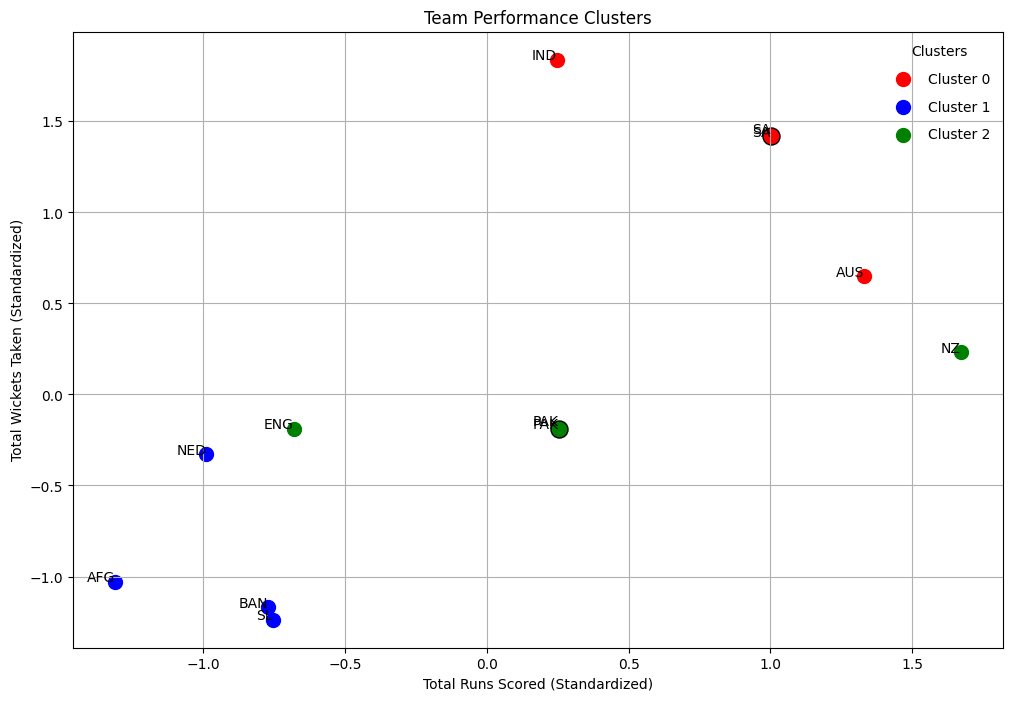

In [26]:
import matplotlib.pyplot as plt

# Create a scatter plot with team names labeled by clusters
plt.figure(figsize=(12, 8))

# Define colors for each cluster
colors = ['red', 'blue', 'green']

# Scatter plot with all team names labeled by clusters
for i, team in enumerate(team_scaled_df['team']):
    cluster = team_scaled_df.loc[i, 'cluster']
    plt.scatter(team_scaled_df.loc[i, 'runs'], team_scaled_df.loc[i, 'wkts'], label=None, c=colors[cluster], cmap='viridis', s=100)
    plt.text(team_scaled_df.loc[i, 'runs'], team_scaled_df.loc[i, 'wkts'], team, fontsize=10, ha='right')

# Highlight specific team names (e.g., PAK, SA)
highlight_teams = ['PAK', 'SA']
for team in highlight_teams:
    idx = team_scaled_df[team_scaled_df['team'] == team].index[0]
    cluster = team_scaled_df.loc[idx, 'cluster']
    plt.scatter(team_scaled_df.loc[idx, 'runs'], team_scaled_df.loc[idx, 'wkts'], label=None, c=colors[cluster], s=150, edgecolors='black')
    plt.text(team_scaled_df.loc[idx, 'runs'], team_scaled_df.loc[idx, 'wkts'], team, fontsize=10, ha='right', va='bottom')

# Add labels and title
plt.xlabel('Total Runs Scored (Standardized)')
plt.ylabel('Total Wickets Taken (Standardized)')
plt.title('Team Performance Clusters')

# Show the legend with cluster colors
for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label=f'Cluster {i}', cmap='viridis', s=100)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Clusters')

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
6651-2000

4651

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


there are total of 20 columns

In [ ]:


# Get summary statistics of numerical columns
df.describe()




,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Check for missing values
df.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Display the dimensions of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (7043, 20)


In [ ]:
# Categorical variables
print("Unique values of categorical variables:")
for col in df.select_dtypes(include=['object']):
    print(col, ":", df[col].unique())

Unique values of categorical variables:
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [ ]:

# Distribution of categorical variables
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    print("\n", col, ":", df[col].value_counts())



 gender : gender
Male      3555
Female    3488
Name: count, dtype: int64

 SeniorCitizen : SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

 Partner : Partner
No     3641
Yes    3402
Name: count, dtype: int64

 Dependents : Dependents
No     4933
Yes    2110
Name: count, dtype: int64

 PhoneService : PhoneService
Yes    6361
No      682
Name: count, dtype: int64

 MultipleLines : MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

 InternetService : InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

 OnlineSecurity : OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

 OnlineBackup : OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

 DeviceProtection : DeviceProtection
No                     3095
Yes              

##Categorical Variables:

For each categorical variable, we can calculate the churn rate (percentage of customers who churned) for each category. We can visualize this using count plots or bar plots to see the distribution of churn across different categories.

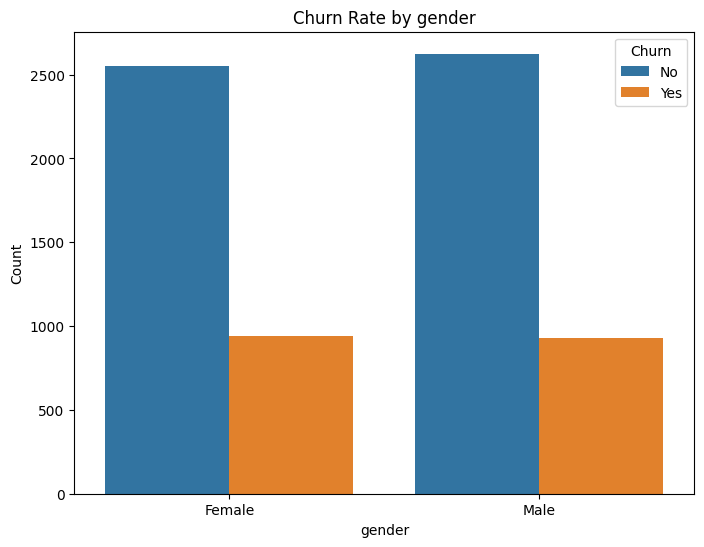

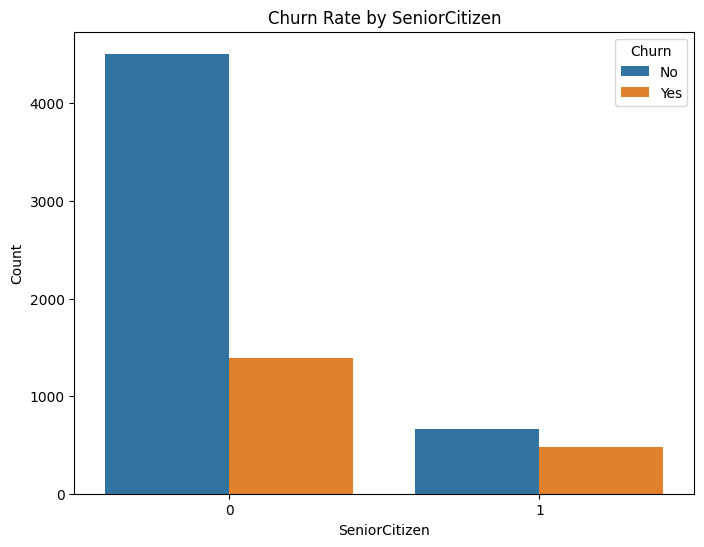

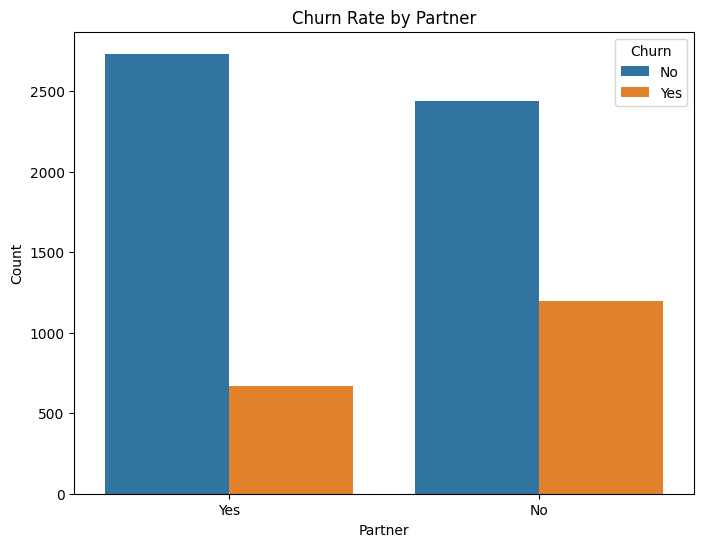

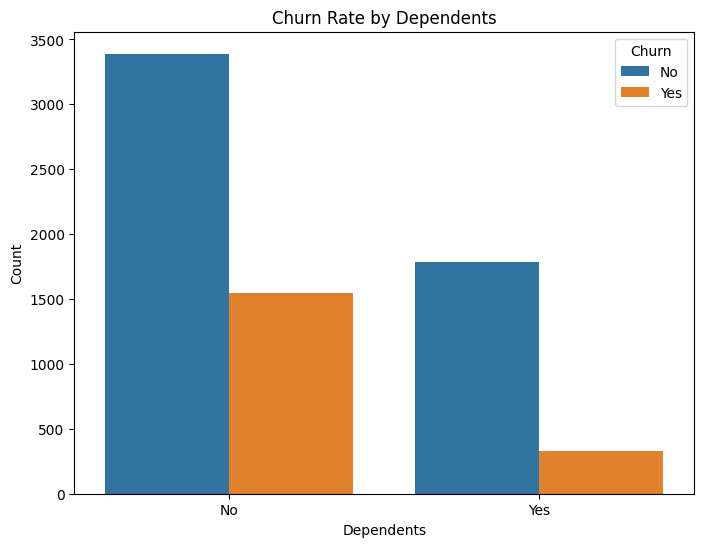

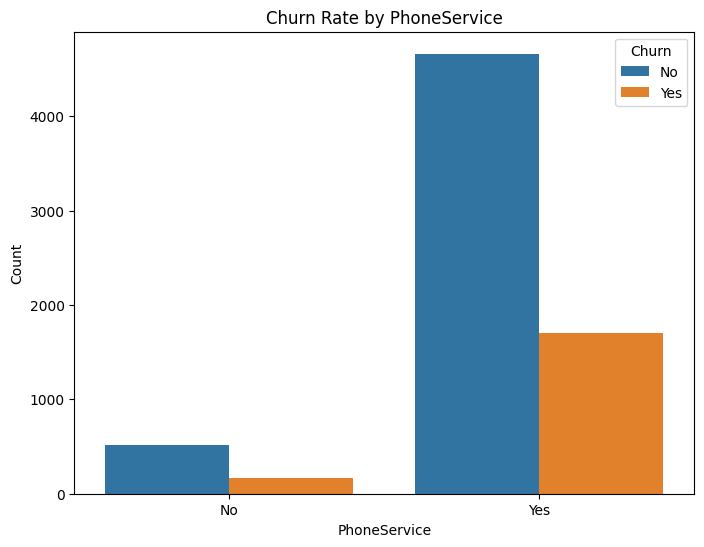

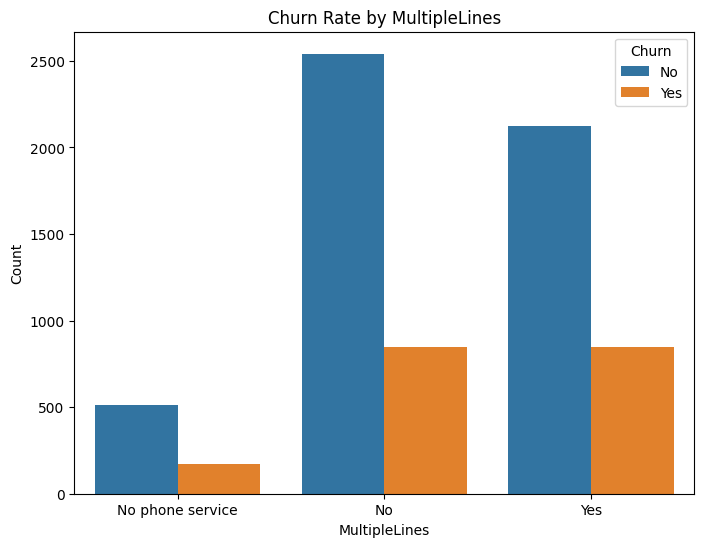

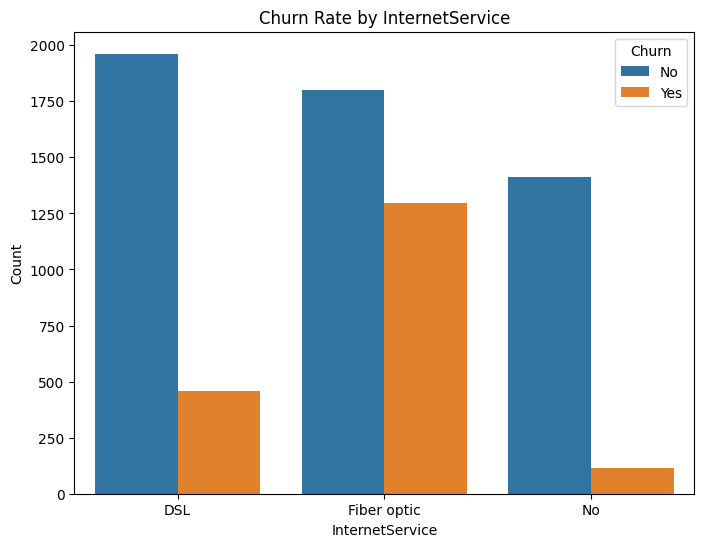

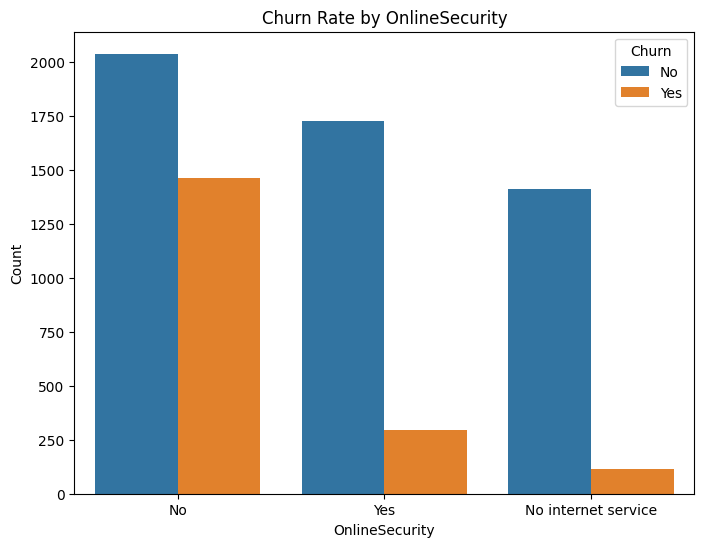

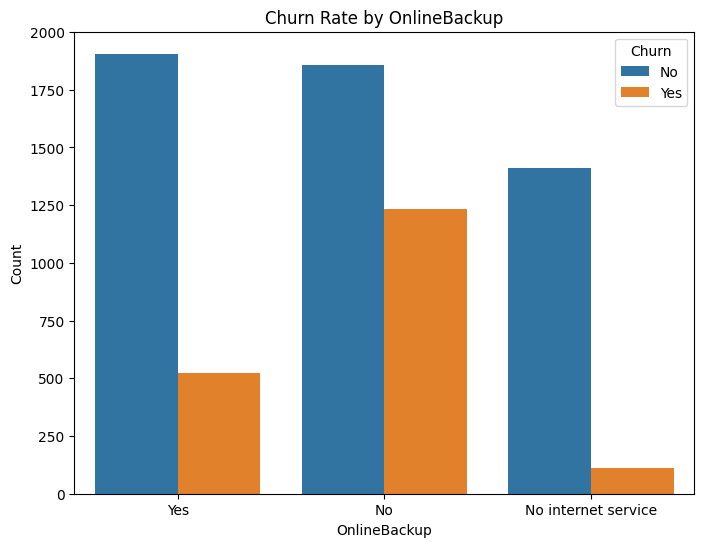

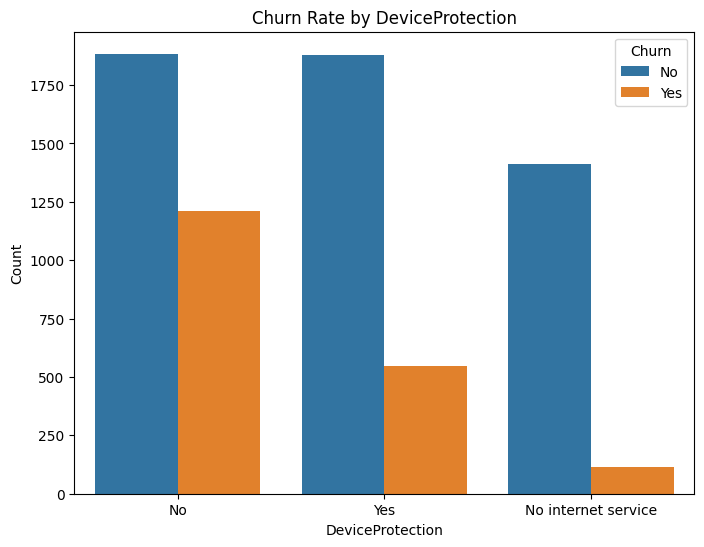

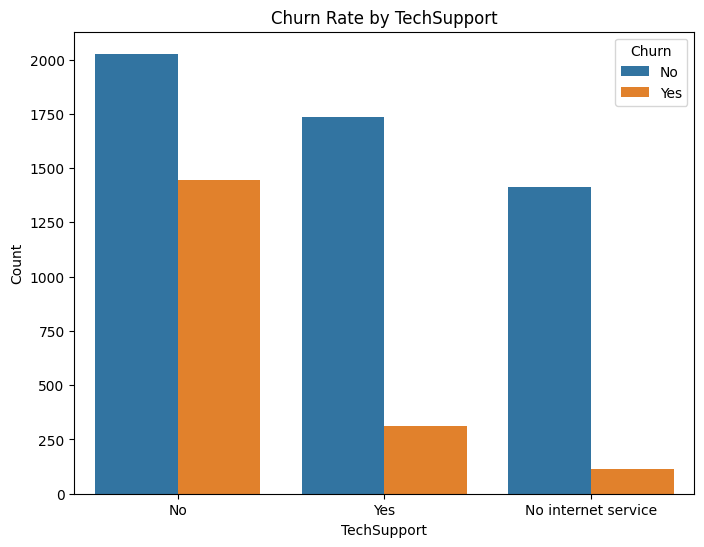

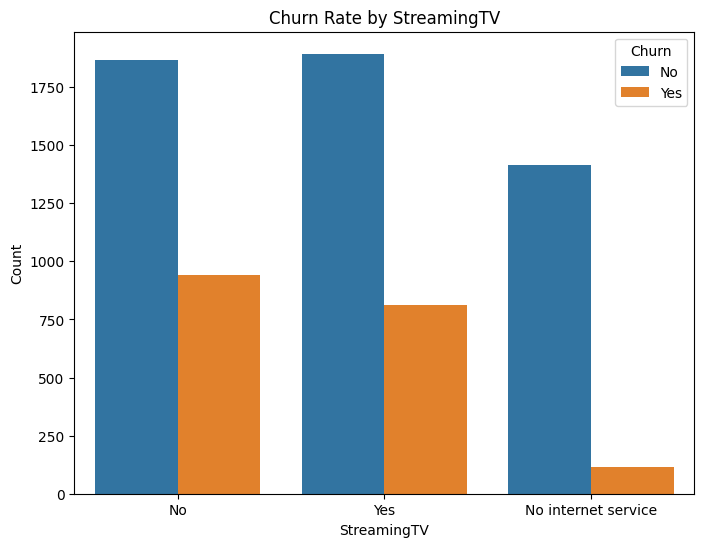

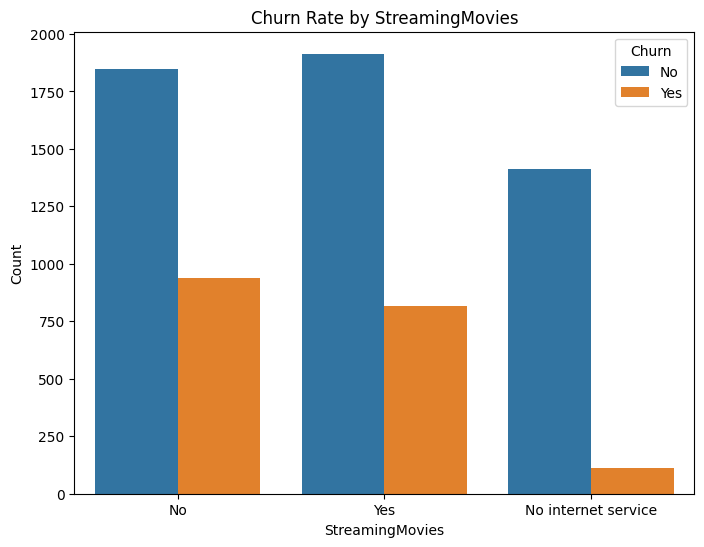

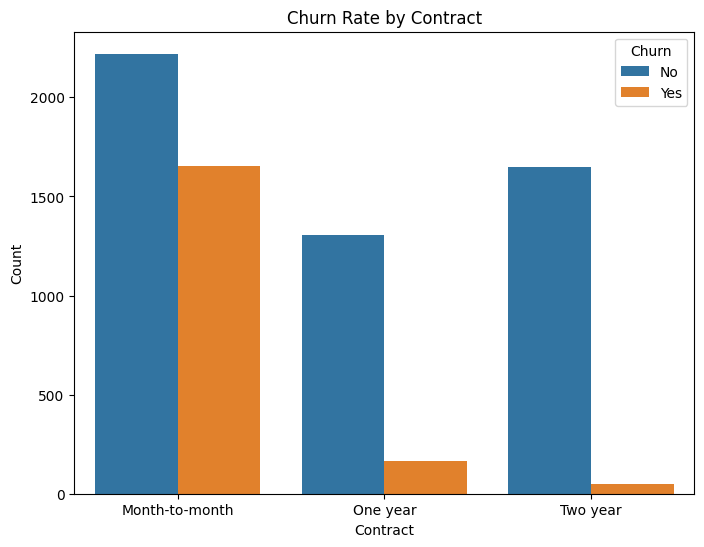

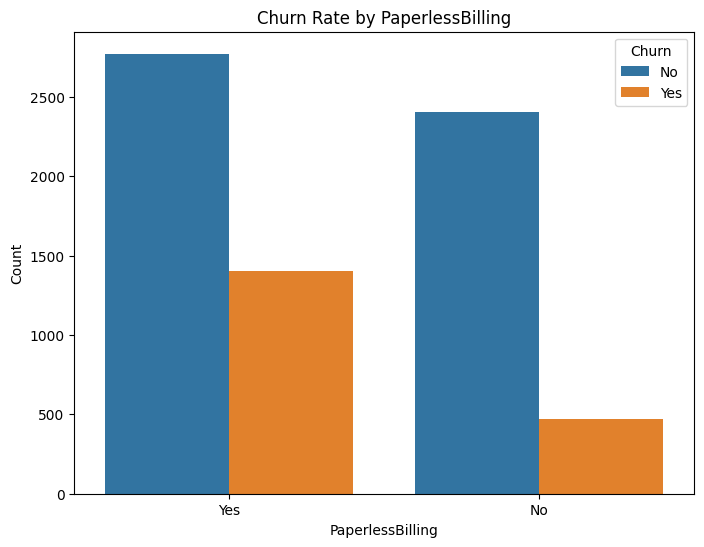

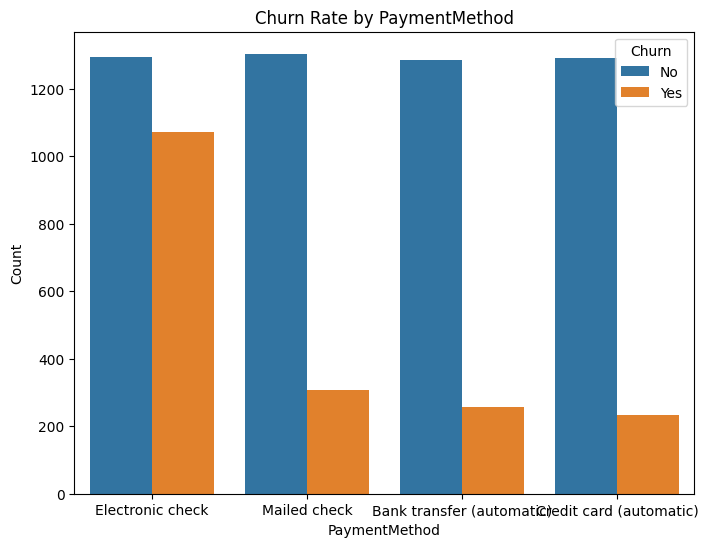

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns (excluding 'Churn')
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Calculate churn rate for each category
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


##Numerical Variables:

For numerical variables, we can compare the distributions of the variable for churned and non-churned customers using box plots or histograms.

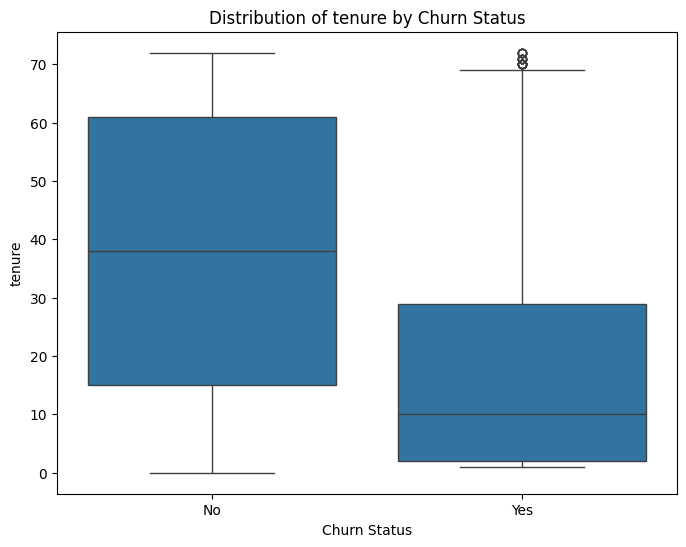

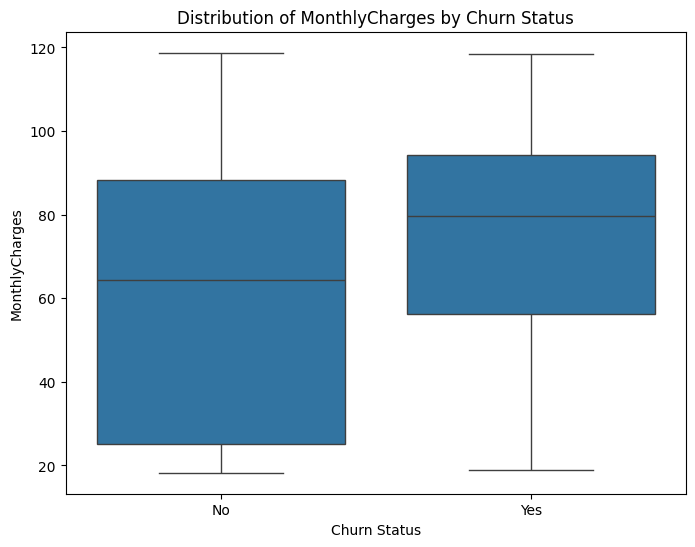

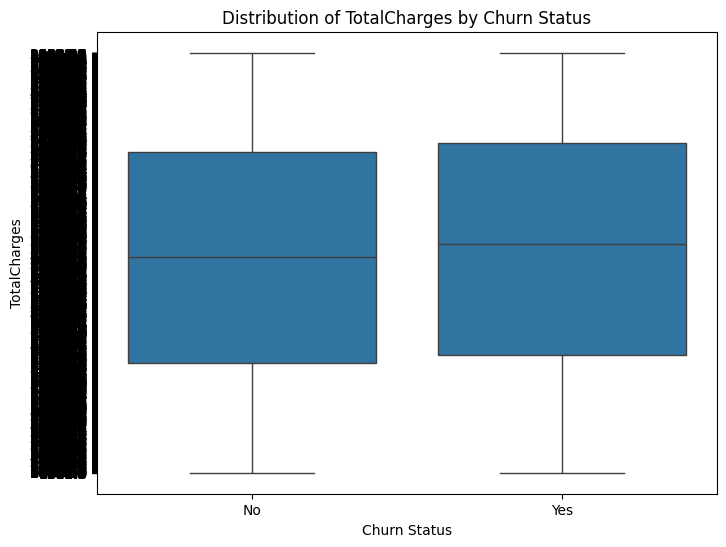

In [ ]:
# List of numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Visualize distribution of numerical variables by Churn status
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'Distribution of {col} by Churn Status')
    plt.xlabel('Churn Status')
    plt.ylabel(col)
    plt.show()


##statistical test

statistical tests (e.g., t-tests, chi-square tests) to quantify the relationship between categorical variables and churn. These tests can help determine if there are significant differences in churn rates between categories of a variable.

In [ ]:
from scipy.stats import chi2_contingency

# Example: Chi-square test for independence between InternetService and Churn
contingency_table = pd.crosstab(df['InternetService'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")


Chi-square statistic: 732.309589667794
P-value: 9.571788222840544e-160




```
InternetService has very high impact on churing
```



In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
from scipy.stats import chi2_contingency

# List of categorical columns (excluding 'Churn')
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Perform Chi-square test for each categorical column
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-square test for independence between {col} and Churn:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")



Chi-square test for independence between gender and Churn:
Chi-square statistic: 0.4840828822091383
P-value: 0.48657873605618596

Chi-square test for independence between SeniorCitizen and Churn:
Chi-square statistic: 159.42630036838742
P-value: 1.510066805092378e-36

Chi-square test for independence between Partner and Churn:
Chi-square statistic: 158.7333820309922
P-value: 2.1399113440759935e-36

Chi-square test for independence between Dependents and Churn:
Chi-square statistic: 189.12924940423474
P-value: 4.9249216612154196e-43

Chi-square test for independence between PhoneService and Churn:
Chi-square statistic: 0.9150329892546948
P-value: 0.3387825358066928

Chi-square test for independence between MultipleLines and Churn:
Chi-square statistic: 11.33044148319756
P-value: 0.0034643829548773

Chi-square test for independence between InternetService and Churn:
Chi-square statistic: 732.309589667794
P-value: 9.571788222840544e-160

Chi-square test for independence between OnlineSec

Low Chi-square values: Typically less than 3 or 5. This suggests that the variables are relatively independent of each other.

Moderate Chi-square values: Typically between 5 and 10. This indicates some association between the variables but not a strong one.

High Chi-square values: Typically greater than 10. This suggests a significant association between the variables, indicating that they are not independent of each other

 '''a Chi-square statistic of over 700 is exceptionally high, indicating a very strong association between the variables under consideration.'''

<ipython-input-21-91b4bf09059b>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chi-square', y='Column', data=chi2_df_sorted, palette='viridis')


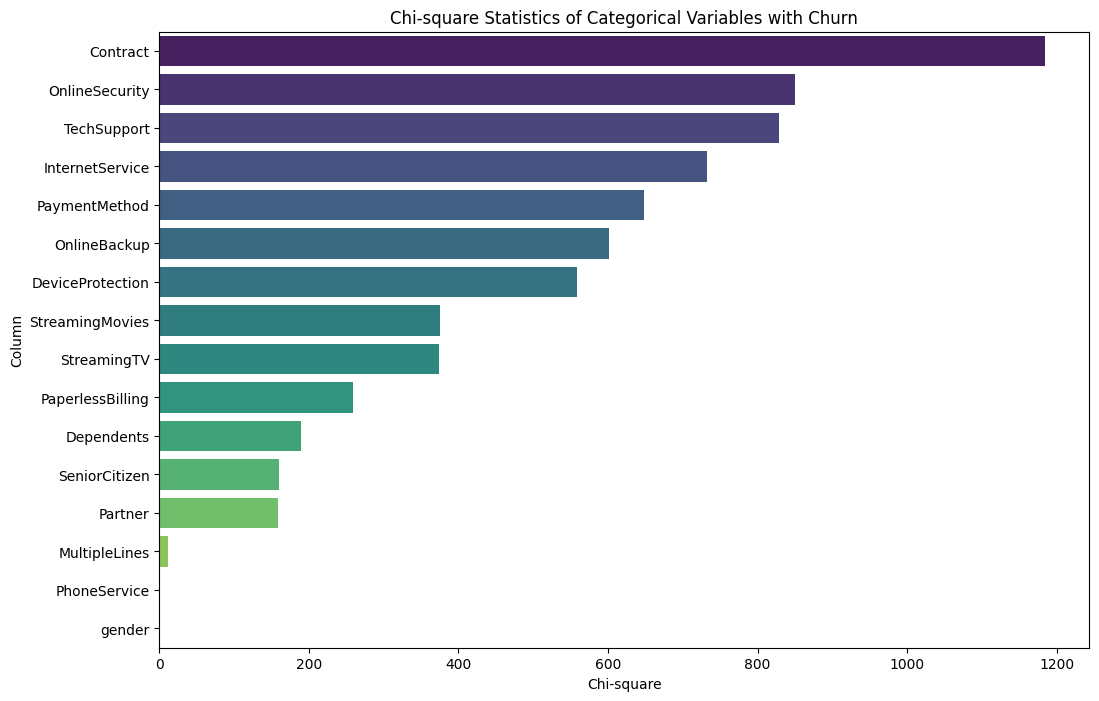

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create lists to store chi-square statistics and column names
chi2_stats = []
column_names = []

# Perform Chi-square test for each categorical column
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    chi2_stats.append(chi2)
    column_names.append(col)

# Create a DataFrame to store chi-square statistics and column names
chi2_df = pd.DataFrame({'Column': column_names, 'Chi-square': chi2_stats})

# Sort DataFrame by Chi-square values
chi2_df_sorted = chi2_df.sort_values(by='Chi-square', ascending=False)

# Plot the Chi-square statistics
plt.figure(figsize=(12, 8))
sns.barplot(x='Chi-square', y='Column', data=chi2_df_sorted, palette='viridis')
plt.title('Chi-square Statistics of Categorical Variables with Churn')
plt.xlabel('Chi-square')
plt.ylabel('Column')
plt.show()


In [ ]:
#Segmentation Analysis
# Example: Segment dataset based on 'Contract' and analyze churn behavior within each segment
segments = df['Contract'].unique()
for segment in segments:
    segment_data = df[df['Contract'] == segment]
    churn_rate = segment_data['Churn'].value_counts(normalize=True)
    print(f"Churn rate for {segment} contract:")
    print(churn_rate)



Churn rate for Month-to-month contract:
Churn
No     0.572903
Yes    0.427097
Name: proportion, dtype: float64
Churn rate for One year contract:
Churn
No     0.887305
Yes    0.112695
Name: proportion, dtype: float64
Churn rate for Two year contract:
Churn
No     0.971681
Yes    0.028319
Name: proportion, dtype: float64


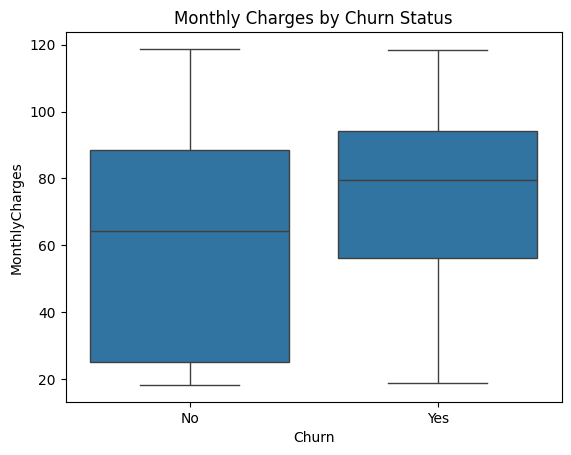

In [ ]:

# Step 5: Bivariate Analysis
# Example: Relationship between MonthlyCharges and Churn
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.show()

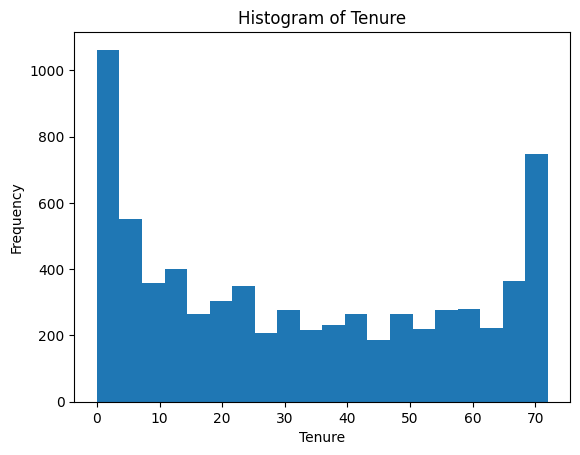

In [ ]:
# Step 7: Data Visualization
# Example: Histogram of tenure
plt.hist(df['tenure'], bins=20)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of Tenure')
plt.show()


#Data Preprocessing:

Convert categorical variables to appropriate data type

 ```
 0   gender            7043 non-null   object
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object
 6   MultipleLines     7043 non-null   object
 7   InternetService   7043 non-null   object
 8   OnlineSecurity    7043 non-null   object
 9   OnlineBackup      7043 non-null   object
 10  DeviceProtection  7043 non-null   object
 11  TechSupport       7043 non-null   object
 12  StreamingTV       7043 non-null   object
 13  StreamingMovies   7043 non-null   object
 14  Contract          7043 non-null   object
 15  PaperlessBilling  7043 non-null   object
 16  PaymentMethod     7043 non-null   object
 17  MonthlyCharges    7043 non-null   float64
 18  TotalCharges      7043 non-null   object
 19  Churn             7043 non-null   object
 ```

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Assuming 'categorical_column' is the name of the column you want to encode
df['gender'] = label_encoder.fit_transform(df['gender'])


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['Partner'] = label_encoder.fit_transform(df['Partner'])


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,0,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['PhoneService'] = label_encoder.fit_transform(df['PhoneService'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


 It appears that the dataset is related to telecommunications or subscription-based services, specifically focusing on customer information and churn prediction


1. **Customer Information**: Columns like ```gender```, 'SeniorCitizen', ```Partner```, and ```Dependents``` suggest demographic information about the customers, which is commonly collected in various industries, including telecommunications.

2. **Services Subscribed**: Columns such as ```PhoneService```, ```MultipleLines```, ```InternetService```, ```OnlineSecurity```, ```OnlineBackup```, ```DeviceProtection```, ```TechSupport```, ```StreamingTV```, and ```StreamingMovies``` indicate the services that customers have subscribed to. These are typical services offered by telecommunications companies or subscription-based services.

3. **Billing and Payment**: Columns like ```Contract```, ```PaperlessBilling```, ```PaymentMethod```, ```MonthlyCharges```, and ```TotalCharges``` provide information about billing details and payment methods, which are crucial in subscription-based businesses.

4. **Churn Prediction**: The presence of the ```Churn``` column suggests that the dataset is likely used for churn prediction analysis. Churn prediction is a common task in industries like telecommunications, where understanding and predicting customer churn (i.e., the rate at which customers stop using the service) is essential for customer retention and business sustainability.

Overall, the dataset seems to be a customer churn dataset from a telecommunications or subscription-based service provider. This type of dataset is commonly used for analyzing customer behavior, predicting churn, and developing strategies for customer retention.



In [ ]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [ ]:
import pandas as pd

# Assuming 'category_column' is the name of the column with three unique categories
category_mapping = {'No': 0, 'Yes': 1, 'No phone service': 2}
df['MultipleLines'] = df['MultipleLines'].map(category_mapping)


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,0,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,0,0,2,1,0,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,2,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,0,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
import pandas as pd

# Assuming 'category_column' is the name of the column with three unique categories
category_mapping = {'No': 0, 'DSL': 1, 'Fiber optic': 2}
df['InternetService'] = df['InternetService'].map(category_mapping)


In [ ]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
import pandas as pd

# Assuming 'category_column' is the name of the column with three unique categories
category_mapping = {'No': 0, 'Yes': 1, 'No internet service': 2}
df['OnlineSecurity'] = df['OnlineSecurity'].map(category_mapping)


In [ ]:
df['OnlineBackup'].unique()


array(['Yes', 'No', 'No internet service'], dtype=object)

In [ ]:
import pandas as pd

# Assuming 'category_column' is the name of the column with three unique categories
category_mapping = {'No': 0, 'Yes': 1, 'No internet service': 2}
df['OnlineBackup'] = df['OnlineBackup'].map(category_mapping)


In [ ]:
df['DeviceProtection'].unique()


array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:

# Assuming 'category_column' is the name of the column with three unique categories
category_mapping = {'No': 0, 'Yes': 1, 'No internet service': 2}
df['DeviceProtection'] = df['DeviceProtection'].map(category_mapping)


In [ ]:
df['TechSupport'].unique()


array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:

# Assuming 'category_column' is the name of the column with three unique categories
category_mapping = {'No': 0, 'Yes': 1, 'No internet service': 2}
df['TechSupport'] = df['TechSupport'].map(category_mapping)


In [ ]:
df['StreamingTV'].unique()


array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:

# Assuming 'category_column' is the name of the column with three unique categories
category_mapping = {'No': 0, 'Yes': 1, 'No internet service': 2}
df['StreamingTV'] = df['StreamingTV'].map(category_mapping)


In [ ]:
df['StreamingMovies'].unique()


array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:

# Assuming 'category_column' is the name of the column with three unique categories
category_mapping = {'No': 0, 'Yes': 1, 'No internet service': 2}
df['StreamingMovies'] = df['StreamingMovies'].map(category_mapping)


In [ ]:
df['Contract'].unique()


array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:

# Assuming 'category_column' is the name of the column with three unique categories
category_mapping = {'Month-to-month': 0, 'One year': 1, 'No internet service': 2}
df['Contract'] = df['Contract'].map(category_mapping)


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0.0,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1.0,No,Mailed check,56.95,1889.5,No
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0.0,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1.0,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0.0,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['PaperlessBilling'].unique()




array(['Yes', 'No'], dtype=object)

In [ ]:

# Assuming 'category_column' is the name of the column with three unique categories
category_mapping = {'No': 0, 'Yes': 1}
df['PaperlessBilling'] = df['PaperlessBilling'].map(category_mapping)


In [ ]:

df['PaymentMethod'].unique()



array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:

# Assuming 'category_column' is the name of the column with three unique categories
category_mapping = {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}
df['PaymentMethod'] = df['PaymentMethod'].map(category_mapping)


In [ ]:
df['Churn'].unique()



array(['No', 'Yes'], dtype=object)

In [ ]:

# Assuming 'category_column' is the name of the column with three unique categories
category_mapping = {'No': 0, 'Yes': 1}
df['Churn'] = df['Churn'].map(category_mapping)


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0.0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1.0,0,1,56.95,1889.5,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0.0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1.0,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0.0,1,0,70.70,151.65,1


###normalize

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Reshape the 'tenure' column to a 2D array as required by MinMaxScaler
tenure_values = df['tenure'].values.reshape(-1, 1)

# Scale the 'tenure' column to the range of 0 to 1
df['tenure'] = scaler.fit_transform(tenure_values)



#

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,2,1,0,1,0,0,0,0,0.0,1,0,29.85,29.85,0
1,1,0,0,0,0.472222,1,0,1,1,0,1,0,0,0,1.0,0,1,56.95,1889.5,0
2,1,0,0,0,0.027778,1,0,1,1,1,0,0,0,0,0.0,1,1,53.85,108.15,1
3,1,0,0,0,0.625000,0,2,1,1,0,1,1,0,0,1.0,0,2,42.30,1840.75,0
4,0,0,0,0,0.027778,1,0,2,0,0,0,0,0,0,0.0,1,0,70.70,151.65,1


In [ ]:
import numpy as np

# Replace non-numeric values with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Convert the column to float
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          5348 non-null   float64
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,2,1,0,1,0,0,0,0,0.0,1,0,29.85,29.85,0
1,1,0,0,0,0.472222,1,0,1,1,0,1,0,0,0,1.0,0,1,56.95,1889.50,0
2,1,0,0,0,0.027778,1,0,1,1,1,0,0,0,0,0.0,1,1,53.85,108.15,1
3,1,0,0,0,0.625000,0,2,1,1,0,1,1,0,0,1.0,0,2,42.30,1840.75,0
4,0,0,0,0,0.027778,1,0,2,0,0,0,0,0,0,0.0,1,0,70.70,151.65,1


###normalize

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Reshape the 'tenure' column to a 2D array as required by MinMaxScaler
tenure_values = df['MonthlyCharges'].values.reshape(-1, 1)

# Scale the 'tenure' column to the range of 0 to 1
df['MonthlyCharges'] = scaler.fit_transform(tenure_values)



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Reshape the 'tenure' column to a 2D array as required by MinMaxScaler
tenure_values = df['TotalCharges'].values.reshape(-1, 1)

# Scale the 'tenure' column to the range of 0 to 1
df['TotalCharges'] = scaler.fit_transform(tenure_values)



In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,2,1,0,1,0,0,0,0,0.0,1,0,0.115423,0.001275,0
1,1,0,0,0,0.472222,1,0,1,1,0,1,0,0,0,1.0,0,1,0.385075,0.215867,0
2,1,0,0,0,0.027778,1,0,1,1,1,0,0,0,0,0.0,1,1,0.354229,0.010310,1
3,1,0,0,0,0.625000,0,2,1,1,0,1,1,0,0,1.0,0,2,0.239303,0.210241,0
4,0,0,0,0,0.027778,1,0,2,0,0,0,0,0,0,0.0,1,0,0.521891,0.015330,1


#Feature Engineering

###Aggregating Information

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()


In [ ]:
correlation_matrix

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.000485,-0.010380,-0.003429,-0.002032,0.005092,0.000985,0.001156,-0.000191,0.008340,-0.011754,-0.005209,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.099883,0.259390,-0.210897,-0.152780,-0.157095,-0.223770,-0.130130,-0.120802,-0.090929,0.156530,-0.093704,0.220173,0.102411,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.090981,-0.000132,0.081850,0.087055,0.094451,0.069072,0.080127,0.075779,0.188110,-0.014877,0.133115,0.096848,0.319072,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.016875,-0.179631,0.190523,0.162445,0.156439,0.180832,0.140395,0.125820,0.162541,-0.111377,0.123844,-0.113890,0.064653,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.242279,0.033230,0.145298,0.178651,0.178649,0.144459,0.136145,0.140781,0.510475,0.006152,0.340305,0.247900,0.825880,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.691070,0.093720,0.125353,0.150338,0.138755,0.123350,0.171538,0.165205,-0.002119,0.016505,-0.004070,0.247398,0.113008,0.011942
MultipleLines,-0.000485,0.099883,0.090981,-0.016875,0.242279,-0.691070,1.000000,0.174989,-0.235021,-0.210372,-0.200463,-0.232155,-0.202414,-0.195815,0.026047,0.108230,0.030659,0.146153,0.251357,0.019423
InternetService,-0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.174989,1.000000,-0.764943,-0.686403,-0.682448,-0.760985,-0.617704,-0.620005,-0.177122,0.378108,-0.178137,0.905491,0.428212,0.316846
OnlineSecurity,-0.003429,-0.210897,0.081850,0.190523,0.145298,0.125353,-0.235021,-0.764943,1.000000,0.751661,0.749040,0.791225,0.701976,0.704984,0.242681,-0.334003,0.213800,-0.621227,-0.153234,-0.332819
OnlineBackup,-0.002032,-0.152780,0.087055,0.162445,0.178651,0.150338,-0.210372,-0.686403,0.751661,1.000000,0.740604,0.754095,0.720671,0.716700,0.221822,-0.262402,0.182909,-0.538454,-0.085017,-0.291449


In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract correlation coefficients between features and the target variable ('Churn')
correlation_with_target = correlation_matrix['Churn'].abs().sort_values(ascending=False)

# Print the correlation coefficients
print(correlation_with_target)


Churn               1.000000
tenure              0.352229
OnlineSecurity      0.332819
TechSupport         0.329852
InternetService     0.316846
Contract            0.296390
OnlineBackup        0.291449
DeviceProtection    0.281465
PaymentMethod       0.262818
StreamingMovies     0.207256
StreamingTV         0.205742
TotalCharges        0.199484
MonthlyCharges      0.193356
PaperlessBilling    0.191825
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
MultipleLines       0.019423
PhoneService        0.011942
gender              0.008612
Name: Churn, dtype: float64


In [ ]:
# Identify the last 4 features with the lowest correlation coefficients with the target variable
features_to_drop = correlation_with_target.tail(3).index

# Drop the identified features from the DataFrame
df.drop(columns=features_to_drop, inplace=True)


In [ ]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.013889,1,0,1,0,0,0,0,0.0,1,0,0.115423,0.001275,0
1,0,0,0,0.472222,1,1,0,1,0,0,0,1.0,0,1,0.385075,0.215867,0
2,0,0,0,0.027778,1,1,1,0,0,0,0,0.0,1,1,0.354229,0.010310,1
3,0,0,0,0.625000,1,1,0,1,1,0,0,1.0,0,2,0.239303,0.210241,0
4,0,0,0,0.027778,2,0,0,0,0,0,0,0.0,1,0,0.521891,0.015330,1


In [ ]:
# Fill NaN values with the mean of the respective column
df.fillna(df.mean(), inplace=True)


#Machine Learning Model Development and Predicting churn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
X = df.drop(['Churn'], axis=1)

In [ ]:
y = df['Churn']

In [ ]:
X.head()


,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,0.013889,1,0,1,0,0,0,0,0.0,1,0,0.115423,0.001275
1,0,0,0,0.472222,1,1,0,1,0,0,0,1.0,0,1,0.385075,0.215867
2,0,0,0,0.027778,1,1,1,0,0,0,0,0.0,1,1,0.354229,0.010310
3,0,0,0,0.625000,1,1,0,1,1,0,0,1.0,0,2,0.239303,0.210241
4,0,0,0,0.027778,2,0,0,0,0,0,0,0.0,1,0,0.521891,0.015330


##train_test split, scaling

In [ ]:
from sklearn.model_selection import train_test_split
#Let’s split X and y using Train test split
X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=42,train_size=0.8)
#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (5634, 16)
train size y :  (5634,)
test size X :  (1409, 16)
test size y :  (1409,)


In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train.columns = X.columns
X_test.columns = X.columns


In [ ]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.437749,-0.969579,1.532186,-0.465683,-0.289059,0.355775,-1.006547,0.290697,-0.905426,-1.074374,0.235570,1.830718,-1.200007,-0.278518,-0.000474,-0.422099
1,-0.437749,-0.969579,-0.652662,0.885537,0.996307,-0.900138,0.282291,-0.993842,-0.905426,0.238931,0.235570,-0.013111,0.833328,0.590828,1.074754,1.255366
2,-0.437749,1.031376,-0.652662,-1.284605,-0.289059,-0.900138,-1.006547,-0.993842,-0.905426,-1.074374,-1.079795,-0.714004,0.833328,-1.147864,-1.376499,-1.002985
3,-0.437749,-0.969579,-0.652662,-1.161766,0.996307,-0.900138,-1.006547,-0.993842,-0.905426,-1.074374,-1.079795,-0.714004,0.833328,-1.147864,0.177346,-0.908113
4,-0.437749,-0.969579,1.532186,-1.325551,-0.289059,0.355775,0.282291,-0.993842,0.351949,-1.074374,-1.079795,-0.013111,0.833328,0.590828,-0.098524,-0.003468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,-0.437749,1.031376,-0.652662,-1.284605,0.996307,0.355775,-1.006547,-0.993842,-0.905426,0.238931,0.235570,-0.714004,0.833328,-1.147864,1.001632,-0.971339
5630,-0.437749,1.031376,1.532186,-0.383791,-0.289059,0.355775,0.282291,0.290697,0.351949,0.238931,0.235570,-0.013111,0.833328,1.460174,0.872006,-0.041063
5631,-0.437749,1.031376,1.532186,-0.834198,-1.574425,1.611689,1.571129,1.575236,1.609324,1.552237,1.550936,-0.714004,0.833328,-1.147864,-1.452945,-0.877993
5632,2.284413,-0.969579,-0.652662,-0.834198,0.996307,-0.900138,-1.006547,0.290697,-0.905426,0.238931,0.235570,-0.714004,0.833328,-1.147864,1.149538,-0.482538


In [ ]:
X_test

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.437749,1.031376,-0.652662,-1.284605,-0.289059,-0.900138,-1.006547,-0.993842,-0.905426,-1.074374,-1.079795,-0.714004,0.833328,-1.147864,-1.331629,-1.002388
1,-0.437749,-0.969579,-0.652662,0.353238,-1.574425,1.611689,1.571129,1.575236,1.609324,1.552237,1.550936,-0.714004,0.833328,0.590828,-1.316672,-0.572634
2,-0.437749,1.031376,1.532186,0.803645,-1.574425,1.611689,1.571129,1.575236,1.609324,1.552237,1.550936,-0.013111,-1.200007,-0.278518,-1.512772,-0.557043
3,-0.437749,-0.969579,-0.652662,-1.284605,0.996307,-0.900138,-1.006547,0.290697,-0.905426,-1.074374,-1.079795,-0.714004,-1.200007,-1.147864,0.381756,-0.979588
4,-0.437749,-0.969579,-0.652662,1.417836,-0.289059,-0.900138,-1.006547,-0.993842,0.351949,-1.074374,-1.079795,-0.013111,-1.200007,0.590828,-0.475768,0.428565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,-0.437749,1.031376,-0.652662,1.294997,-0.289059,-0.900138,0.282291,0.290697,0.351949,-1.074374,0.235570,-0.013111,0.833328,-0.278518,0.114195,0.923359
1405,-0.437749,1.031376,1.532186,0.762699,0.996307,0.355775,0.282291,-0.993842,0.351949,0.238931,0.235570,1.830718,-1.200007,1.460174,1.501854,1.501702
1406,-0.437749,1.031376,1.532186,-0.629468,-1.574425,1.611689,1.571129,1.575236,1.609324,1.552237,1.550936,1.830718,-1.200007,0.590828,-1.494492,-0.867511
1407,-0.437749,1.031376,1.532186,1.499728,-0.289059,0.355775,-1.006547,0.290697,-0.905426,-1.074374,0.235570,-0.013111,0.833328,1.460174,-0.695134,0.295876


In [ ]:
#check for distribution of labels
y_train.value_counts(normalize=True)

Churn
0    0.734469
1    0.265531
Name: proportion, dtype: float64

#Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#For test and train data.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)

    A = (((C.T)/(C.sum(axis=1))).T)
    B = (C/C.sum(axis=0))

    plt.figure(figsize = (20,4))
    labels = [1,2]
    sns.set_style('darkgrid')

    plt.subplot(1,3,1)
    sns.heatmap(C, annot = True , fmt = ".3f", xticklabels = labels, yticklabels = labels)
    colors=['#011f4b','#03396c','#005b96','#6497b1','#b3cde0']
    sns.set_palette(sns.color_palette(colors))
    plt.xlabel("Predicted Class")
    plt.ylabel("Original Class")
    plt.title("Confusion matrix")

    plt.subplot(1,3,2)
    sns.heatmap(B, annot = True , fmt = ".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Original Class")
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot = True , fmt = ".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Orziginal Class")
    plt.title("Recall matrix")

    plt.show()

def curve(a, rf_fpr, rf_tpr, rf_auc):
  # plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
  plt.plot(rf_fpr, rf_tpr, marker='.', label= a + ' (AUROC = %0.3f)' % rf_auc)
  # Title
  plt.title('ROC plot without oversampling')
  # Axis labels
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  # Show legend
  plt.legend() #
  # Show plot
  plt.show()



In [ ]:
from sklearn import metrics

#All Scores with True Positive, True Negative

In [ ]:
def score_generate_train(X_train, y_actual, preds, model):

    accuracy = metrics.accuracy_score(y_train, preds)
    print('accuracy ',accuracy)
    precision_positive = metrics.precision_score(y_train, preds, pos_label=1)
    precision_negative = metrics.precision_score(y_train, preds, pos_label=0)


    print('precision_positive ',precision_positive)
    print('precision_negative ',precision_negative)

    recall_sensitivity = metrics.recall_score(y_train, preds, pos_label=1)
    recall_specificity = metrics.recall_score(y_train, preds, pos_label=0)
    print('recall_sensitivity ',recall_sensitivity)
    print('recall_specificity ',recall_specificity)

    f1_positive = metrics.f1_score(y_train, preds, pos_label=1)
    f1_negative = metrics.f1_score(y_train, preds, pos_label=0)


    print('f1_positive score ',f1_positive)
    print('f1_negative score ',f1_negative)



    print(metrics.classification_report(y_train, preds))






    hamming_loss = metrics.hamming_loss(y_train, preds)
    print('hamming_loss ',hamming_loss )


    logloss = metrics.log_loss(y_train, model.predict_proba(X_train))
    print('log loss ',logloss)


    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve

    # Import necessary modules
    from sklearn.metrics import roc_curve

    y_score1 = model.predict_proba(X_train)[:,1]
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, y_score1)
    print('roc_auc_score for ', model,' : ', roc_auc_score(y_train, y_score1))
    sns.set_style('darkgrid')

    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_train)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()



In [ ]:
def score_generate(X_test, y_actual, preds, model):

    accuracy = metrics.accuracy_score(y_test, preds)
    print('accuracy ',accuracy)
    precision_positive = metrics.precision_score(y_test, preds, pos_label=1)
    precision_negative = metrics.precision_score(y_test, preds, pos_label=0)


    print('precision_positive ',precision_positive)
    print('precision_negative ',precision_negative)

    recall_sensitivity = metrics.recall_score(y_test, preds, pos_label=1)
    recall_specificity = metrics.recall_score(y_test, preds, pos_label=0)
    print('recall_sensitivity ',recall_sensitivity)
    print('recall_specificity ',recall_specificity)

    f1_positive = metrics.f1_score(y_test, preds, pos_label=1)
    f1_negative = metrics.f1_score(y_test, preds, pos_label=0)


    print('f1_positive score ',f1_positive)
    print('f1_negative score ',f1_negative)



    print(metrics.classification_report(y_test, preds))






    hamming_loss = metrics.hamming_loss(y_test, preds)
    print('hamming_loss ',hamming_loss )


    logloss = metrics.log_loss(y_test, model.predict_proba(X_test))
    print('log loss ',logloss)


    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve

    # Import necessary modules
    from sklearn.metrics import roc_curve

    y_score1 = model.predict_proba(X_test)[:,1]
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
    print('roc_auc_score for ', model,' : ', roc_auc_score(y_test, y_score1))
    sns.set_style('darkgrid')

    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()



#catboost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.8 MB/s eta 0:00:00


In [ ]:
import catboost as ctb

In [ ]:
model_CBC = ctb.CatBoostClassifier()
model_CBC.fit(X_train, y_train)
#class_weight={0:0.6,1:0.3}
print(model_CBC)

Learning rate set to 0.021554
0:	learn: 0.6806671	total: 65.6ms	remaining: 1m 5s
1:	learn: 0.6664483	total: 78.7ms	remaining: 39.2s
2:	learn: 0.6531176	total: 94ms	remaining: 31.3s
3:	learn: 0.6411758	total: 112ms	remaining: 27.9s
4:	learn: 0.6291049	total: 128ms	remaining: 25.4s
5:	learn: 0.6176383	total: 155ms	remaining: 25.7s
6:	learn: 0.6070842	total: 168ms	remaining: 23.9s
7:	learn: 0.5968220	total: 192ms	remaining: 23.8s
8:	learn: 0.5876176	total: 212ms	remaining: 23.3s
9:	learn: 0.5795889	total: 235ms	remaining: 23.3s
10:	learn: 0.5716366	total: 252ms	remaining: 22.6s
11:	learn: 0.5652893	total: 261ms	remaining: 21.5s
12:	learn: 0.5578686	total: 283ms	remaining: 21.5s
13:	learn: 0.5513172	total: 300ms	remaining: 21.1s
14:	learn: 0.5447768	total: 317ms	remaining: 20.8s
15:	learn: 0.5392535	total: 335ms	remaining: 20.6s
16:	learn: 0.5333216	total: 354ms	remaining: 20.4s
17:	learn: 0.5277394	total: 364ms	remaining: 19.9s
18:	learn: 0.5223916	total: 380ms	remaining: 19.6s
19:	learn:

In [ ]:
expected_y  = y_test
predicted_y = model_CBC.predict(X_test)

accuracy  0.8627973020944267
precision_positive  0.7917675544794189
precision_negative  0.8828213879408419
recall_sensitivity  0.6557486631016043
recall_specificity  0.9376510391493476
f1_positive score  0.7173674588665448
f1_negative score  0.9094105238485878
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4138
           1       0.79      0.66      0.72      1496

    accuracy                           0.86      5634
   macro avg       0.84      0.80      0.81      5634
weighted avg       0.86      0.86      0.86      5634

hamming_loss  0.1372026979055733
log loss  0.31107503679058396
roc_auc_score for  <catboost.core.CatBoostClassifier object at 0x7e4171aaaf50>  :  0.9300222697937208


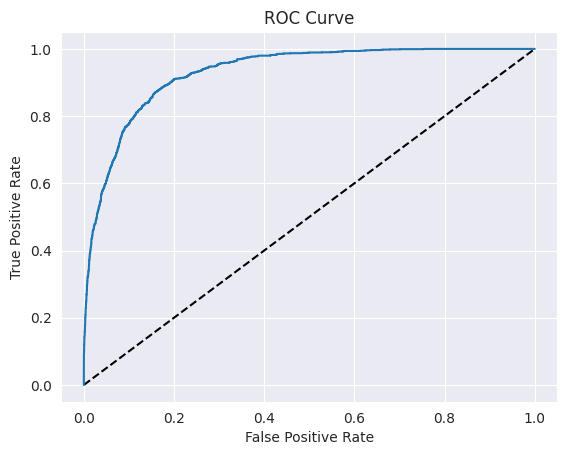

In [ ]:
predicted_y_train = model_CBC.predict(X_train)
score_generate_train(X_train, y_train, predicted_y_train,model_CBC)

accuracy  0.8048261178140526
precision_positive  0.6633333333333333
precision_negative  0.8431018935978359
recall_sensitivity  0.5335120643431636
recall_specificity  0.9025096525096525
f1_positive score  0.5913818722139673
f1_negative score  0.8717948717948718
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409

hamming_loss  0.19517388218594747
log loss  0.40611828738733724
roc_auc_score for  <catboost.core.CatBoostClassifier object at 0x7e4171aaaf50>  :  0.8548008943451303


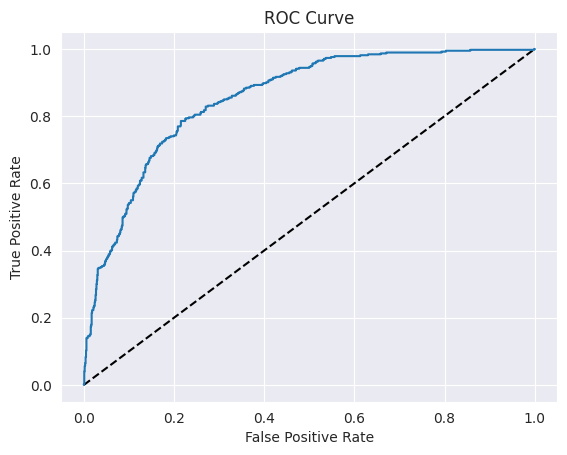

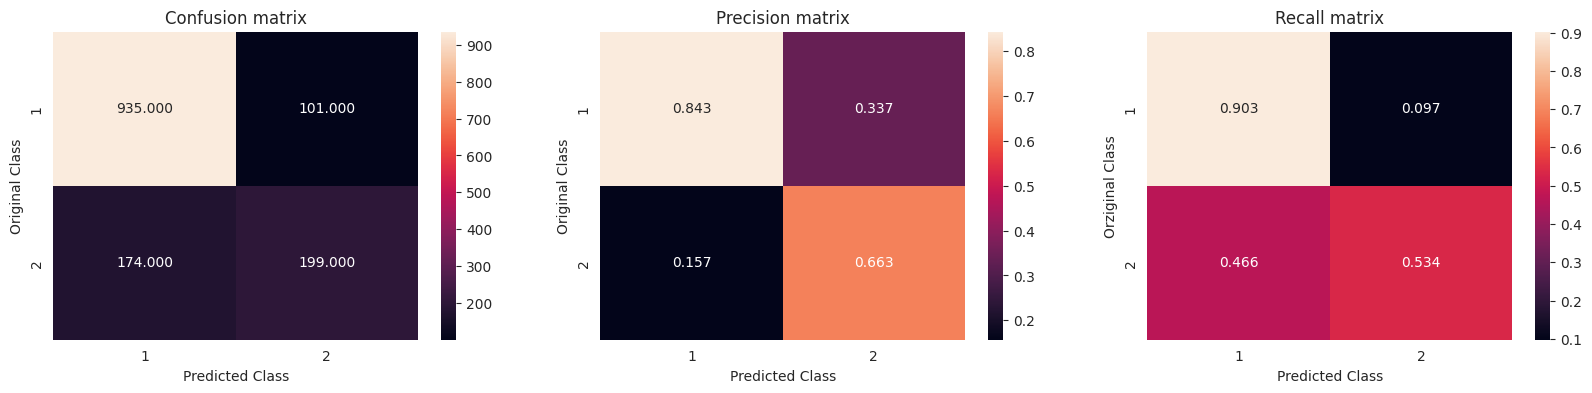

In [ ]:

score_generate(X_test, y_test, predicted_y,model_CBC)
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
model_CBC.score(X_test,y_test)

0.9751552795031055

#xg

First, the number of sub-trees to train, second, the maximum tree depth (a regularization hyperparameter), fourth, the L1 (reg alpha) and L2 (reg lambda) regularization rates that determine the extremity of weights on the leaves, fifth, the complexity control (gamma=), a pseudo-regularization hyperparameter, and sixth, the minimum child weight.

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)



In [ ]:
xgb2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

In [ ]:
xgb2.score(X_test,y_test)

0.7913413768630234

accuracy  0.8986510472133475
precision_positive  0.8474830954169797
precision_negative  0.9144782709737392
recall_sensitivity  0.7540106951871658
recall_specificity  0.9509424842919285
f1_positive score  0.7980191015210472
f1_negative score  0.9323539864944913
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4138
           1       0.85      0.75      0.80      1496

    accuracy                           0.90      5634
   macro avg       0.88      0.85      0.87      5634
weighted avg       0.90      0.90      0.90      5634

hamming_loss  0.10134895278665247
log loss  0.25315893326261213
roc_auc_score for  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_

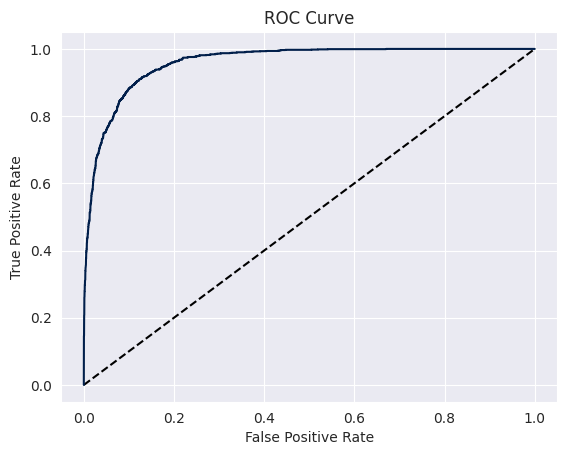

In [ ]:
predicted_y_train = xgb2.predict(X_train)
score_generate_train(X_train, y_train, predicted_y_train,xgb2)

accuracy  0.7913413768630234
precision_positive  0.6253968253968254
precision_negative  0.8391224862888482
recall_sensitivity  0.5281501340482574
recall_specificity  0.8861003861003861
f1_positive score  0.5726744186046511
f1_negative score  0.8619718309859156
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.53      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

hamming_loss  0.20865862313697658
log loss  0.44867518245814203
roc_auc_score for  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_

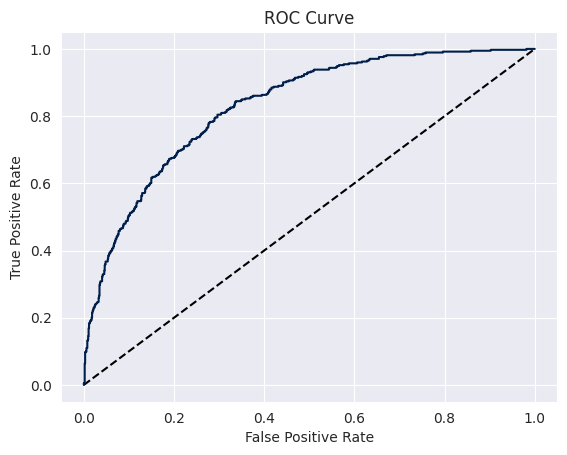

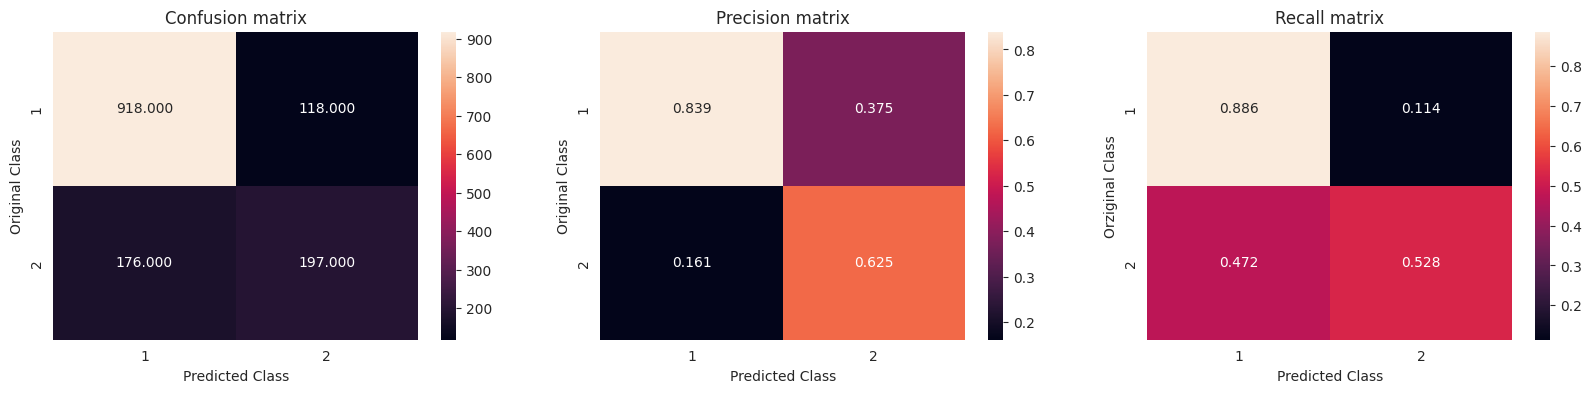

In [ ]:
y_pred = xgb2.predict(X_test)
score_generate(X_test, y_test, y_pred,xgb2)
plot_confusion_matrix(y_test, y_pred)


#adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_ada = AdaBoostClassifier(n_estimators=100, random_state=1)
model_ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [ ]:
y_pred = model_ada.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

accuracy  0.8086616968406106
precision_positive  0.6735880398671097
precision_negative  0.845372460496614
recall_sensitivity  0.5421122994652406
recall_specificity  0.9050265828902851
f1_positive score  0.6007407407407408
f1_negative score  0.8741830065359476
              precision    recall  f1-score   support

           0       0.85      0.91      0.87      4138
           1       0.67      0.54      0.60      1496

    accuracy                           0.81      5634
   macro avg       0.76      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634

hamming_loss  0.19133830315938943
log loss  0.6833268855401743
roc_auc_score for  AdaBoostClassifier(n_estimators=100, random_state=1)  :  0.8593559787595342


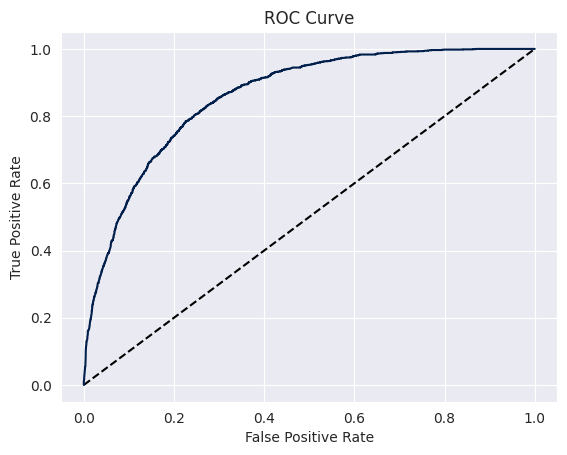

In [ ]:
predicted_y_train = model_ada.predict(X_train)
score_generate_train(X_train, y_train, predicted_y_train,model_ada)

accuracy  0.808374733853797
precision_positive  0.6634920634920635
precision_negative  0.850091407678245
recall_sensitivity  0.5603217158176944
recall_specificity  0.8976833976833977
f1_positive score  0.6075581395348837
f1_negative score  0.8732394366197184
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

hamming_loss  0.19162526614620298
log loss  0.683138485770112
roc_auc_score for  AdaBoostClassifier(n_estimators=100, random_state=1)  :  0.8608201269059177


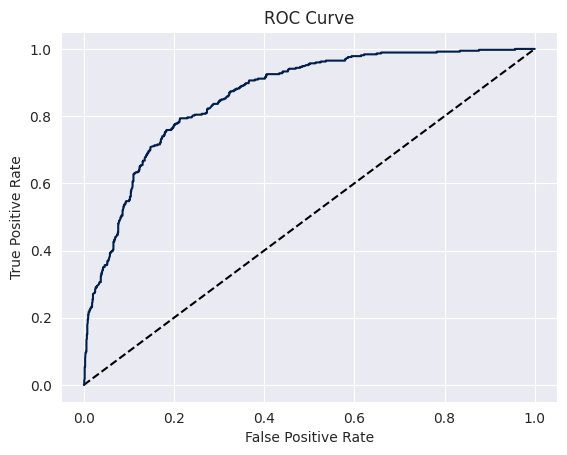

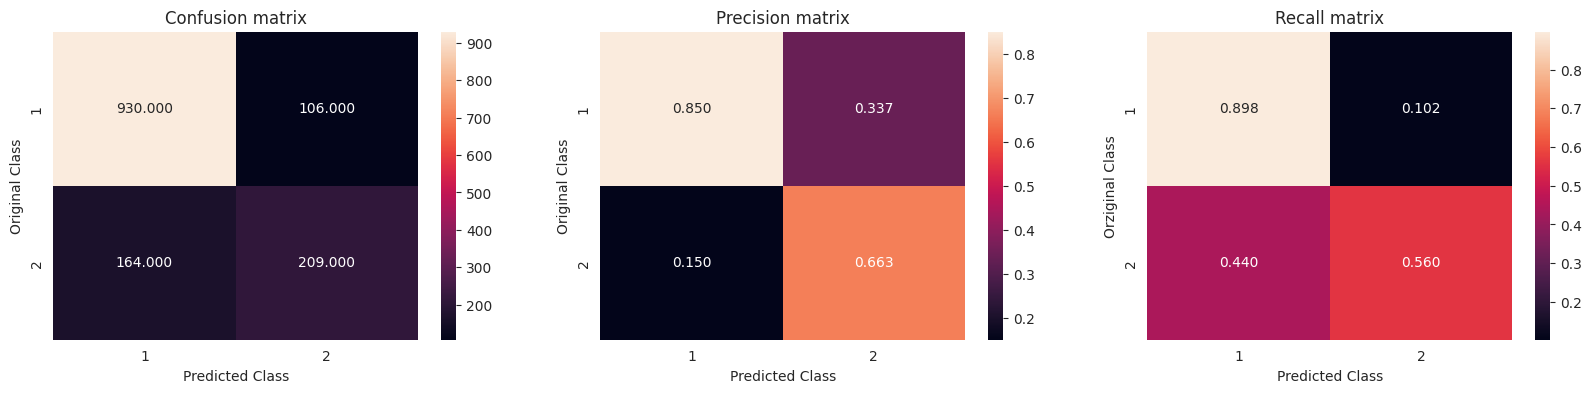

In [ ]:
score_generate(X_test, y_test, y_pred,model_ada)
plot_confusion_matrix(y_test, y_pred)

In [ ]:

print('Accuracy score', accuracy_score(y_test, y_pred))

Accuracy score 0.808374733853797


#SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [ ]:
svc = SVC(kernel = 'linear', C = 0.001, random_state=0,gamma='auto', probability=True) #'linear', 'poly', 'rbf', 'sigmoid'

svc.fit(X_train, y_train)
svc.score(X_test,y_test)

0.7650816181689141

In [ ]:
X_train.shape

(5634, 16)

In [ ]:
X_test.shape

(1409, 16)

In [ ]:
y_train.shape

(5634,)

In [ ]:
y_test.shape

(1409,)

In [ ]:
X.shape

(7043, 16)

In [ ]:
X.shape

(7043, 16)

accuracy  0.7607383741569045
precision_positive  0.7936507936507936
precision_negative  0.7591973244147158
recall_sensitivity  0.13368983957219252
recall_specificity  0.9874335427742871
f1_positive score  0.22883295194508013
f1_negative score  0.8584033613445378
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      4138
           1       0.79      0.13      0.23      1496

    accuracy                           0.76      5634
   macro avg       0.78      0.56      0.54      5634
weighted avg       0.77      0.76      0.69      5634

hamming_loss  0.2392616258430955
log loss  0.4393587330387058
roc_auc_score for  SVC(C=0.001, gamma='auto', kernel='linear', probability=True, random_state=0)  :  0.8311047116460715


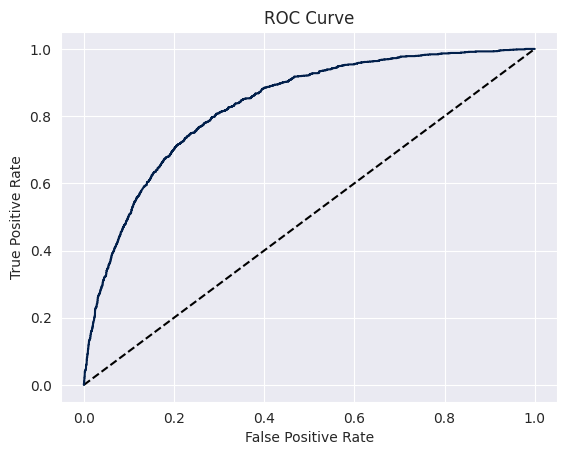

In [ ]:
predicted_y_train = svc.predict(X_train)
score_generate_train(X_train, y_train, predicted_y_train,svc)

In [ ]:
y_pred = svc.predict(X_test)

accuracy  0.7650816181689141
precision_positive  0.7916666666666666
precision_negative  0.7636499626028422
recall_sensitivity  0.15281501340482573
recall_specificity  0.9855212355212355
f1_positive score  0.25617977528089886
f1_negative score  0.8605141171512855
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1036
           1       0.79      0.15      0.26       373

    accuracy                           0.77      1409
   macro avg       0.78      0.57      0.56      1409
weighted avg       0.77      0.77      0.70      1409

hamming_loss  0.23491838183108588
log loss  0.4101016203754698
roc_auc_score for  SVC(C=0.001, gamma='auto', kernel='linear', probability=True, random_state=0)  :  0.8549626321074042


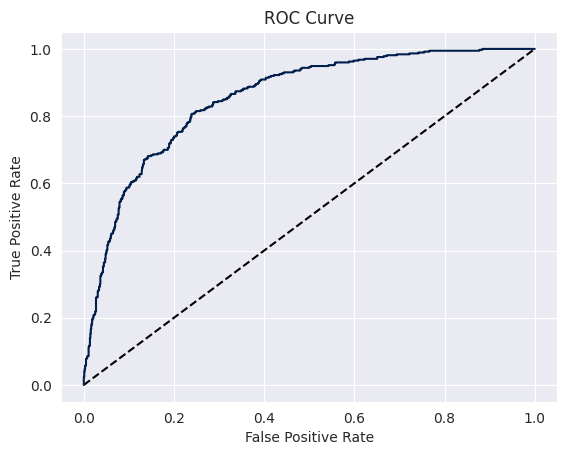

In [ ]:
score_generate(X_test, y_test, y_pred, svc)

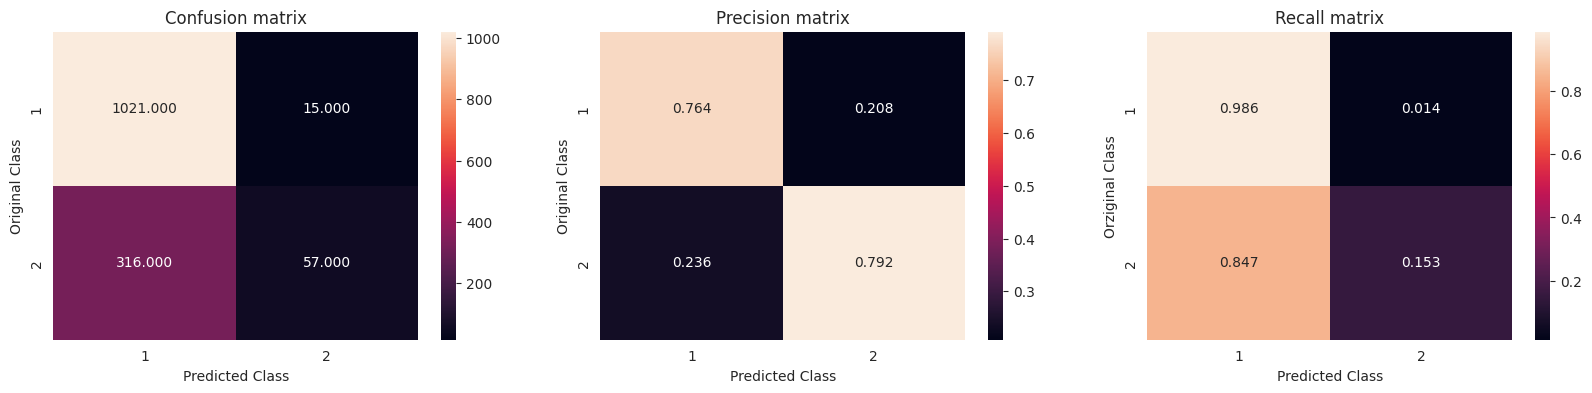

In [ ]:

plot_confusion_matrix(y_test, y_pred)

#logit

In [ ]:
logistic_model = LogisticRegression(solver = 'newton-cg', penalty = 'l2', max_iter = 100, C = 5, random_state = 42)

logistic_model.fit(X_train, y_train)

logistic_model.score(X_test,y_test)

0.8197303051809794

accuracy  0.7964146254881079
precision_positive  0.6445733222866611
precision_negative  0.8378134176643325
recall_sensitivity  0.5200534759358288
recall_specificity  0.8963267278878685
f1_positive score  0.5756566777654457
f1_negative score  0.866082895504962
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4138
           1       0.64      0.52      0.58      1496

    accuracy                           0.80      5634
   macro avg       0.74      0.71      0.72      5634
weighted avg       0.79      0.80      0.79      5634

hamming_loss  0.20358537451189207
log loss  0.4254195190029199
roc_auc_score for  LogisticRegression(C=5, random_state=42, solver='newton-cg')  :  0.8378793424966982


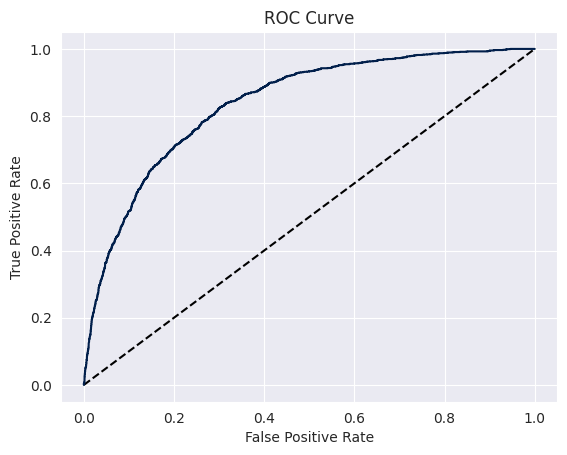

In [ ]:
predicted_y_train = logistic_model.predict(X_train)
score_generate_train(X_train, y_train, predicted_y_train,logistic_model)

accuracy  0.8197303051809794
precision_positive  0.6853582554517134
precision_negative  0.859375
recall_sensitivity  0.5898123324396782
recall_specificity  0.9025096525096525
f1_positive score  0.6340057636887607
f1_negative score  0.8804143126177024
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

hamming_loss  0.18026969481902058
log loss  0.4016658191324591
roc_auc_score for  LogisticRegression(C=5, random_state=42, solver='newton-cg')  :  0.8585454470172968


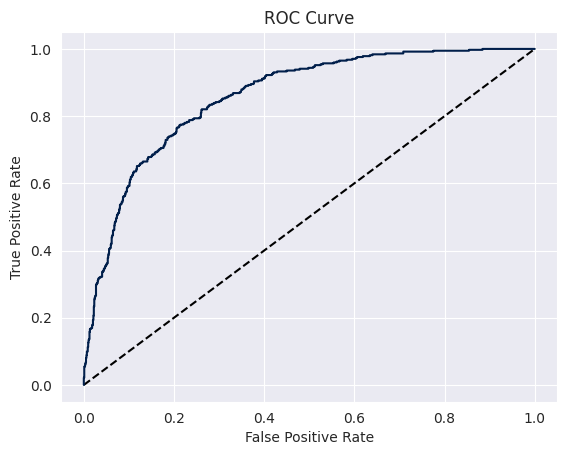

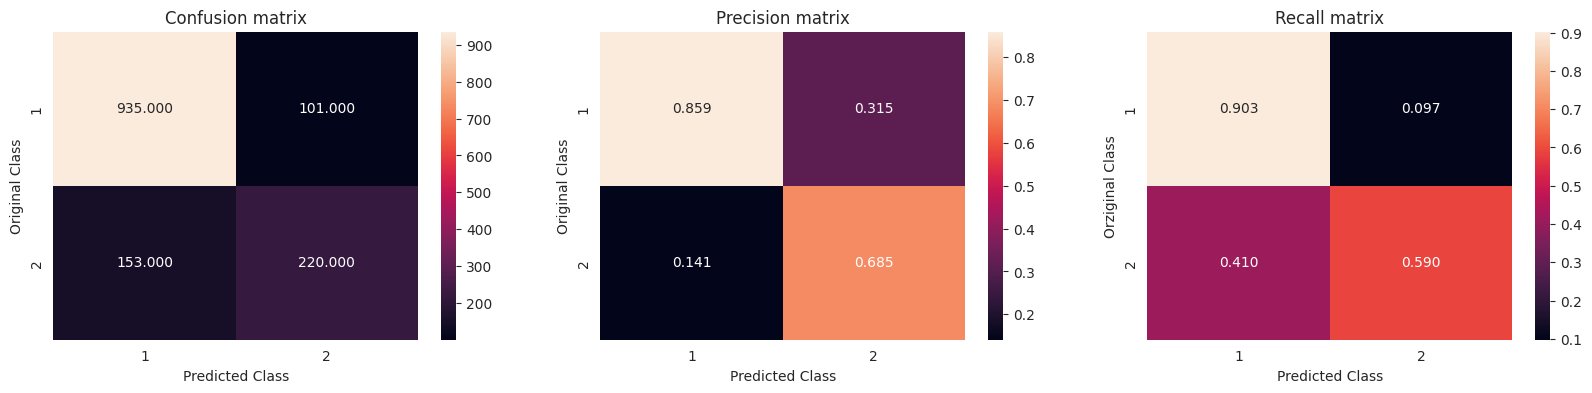

In [ ]:
y_pred = logistic_model.predict(X_test)
score_generate(X_test, y_test, y_pred,logistic_model)
plot_confusion_matrix(y_test, y_pred)

#random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators = 400,
                                             min_samples_split = 20,
                                             min_samples_leaf = 10,
                                             criterion = 'gini',
                                             n_jobs=1,
                                             bootstrap =  True,
                                             max_depth = 150,
                                             max_features = 'auto',
                                             random_state=0)

random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8090844570617459

accuracy  0.8363507277245297
precision_positive  0.7544326241134752
precision_negative  0.8568575233022636
recall_sensitivity  0.5688502673796791
recall_specificity  0.9330594490091831
f1_positive score  0.6486280487804879
f1_negative score  0.8933364183248496
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4138
           1       0.75      0.57      0.65      1496

    accuracy                           0.84      5634
   macro avg       0.81      0.75      0.77      5634
weighted avg       0.83      0.84      0.83      5634

hamming_loss  0.16364927227547035
log loss  0.35004978951077914
roc_auc_score for  RandomForestClassifier(max_depth=150, max_features='auto', min_samples_leaf=10,
                       min_samples_split=20, n_estimators=400, n_jobs=1,
                       random_state=0)  :  0.9052042760071647


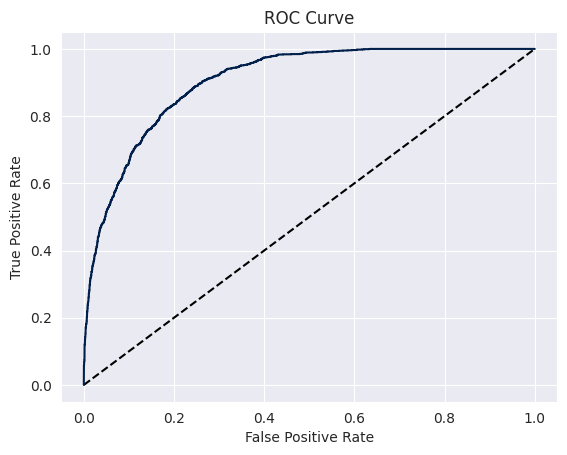

In [ ]:
predicted_y_train = random_forest_model.predict(X_train)
score_generate_train(X_train, y_train, predicted_y_train,random_forest_model)

accuracy  0.8090844570617459
precision_positive  0.6857142857142857
precision_negative  0.8396811337466785
recall_sensitivity  0.514745308310992
recall_specificity  0.915057915057915
f1_positive score  0.5880551301684532
f1_negative score  0.8757505773672055
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

hamming_loss  0.19091554293825408
log loss  0.3945228567581614
roc_auc_score for  RandomForestClassifier(max_depth=150, max_features='auto', min_samples_leaf=10,
                       min_samples_split=20, n_estimators=400, n_jobs=1,
                       random_state=0)  :  0.8640949931164408


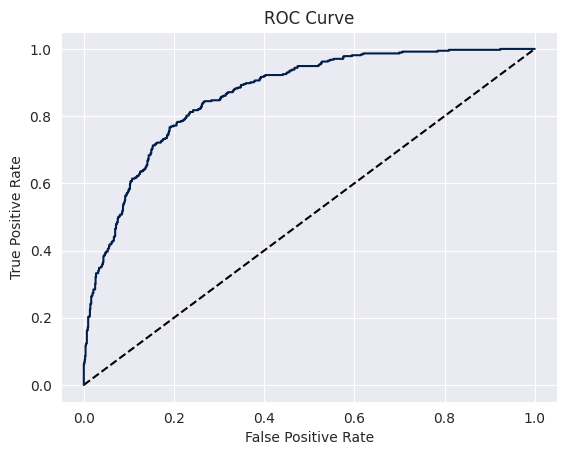

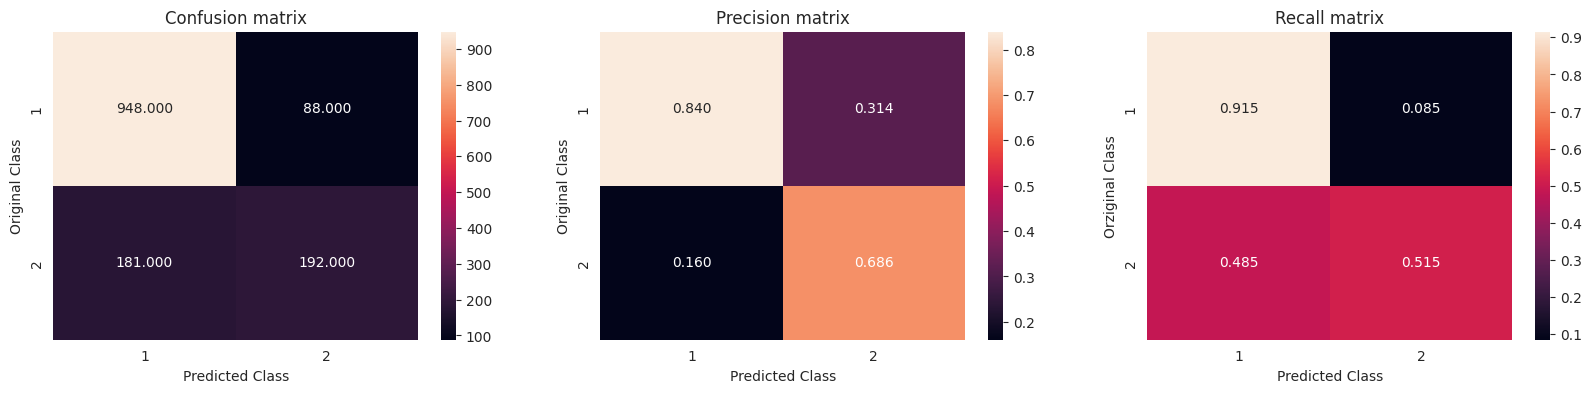

In [ ]:
y_pred = random_forest_model.predict(X_test)
score_generate(X_test,y_test, y_pred,random_forest_model)
plot_confusion_matrix(y_test, y_pred)

#NuSVC

In [ ]:
from sklearn.svm import NuSVC
nusvcc=NuSVC(nu=.2015230,kernel='rbf',gamma='scale',tol =1e-13, probability=True)

In [ ]:
nusvcc.fit(X_train, y_train)
nusvcc.score(X_test,y_test)

0.7494677075940384

In [ ]:
y_prednusvc = nusvcc.predict(X_test)

accuracy  0.9311324103656372
precision_positive  0.8723118279569892
precision_negative  0.9522431259044862
recall_sensitivity  0.8676470588235294
recall_specificity  0.9540840985983567
f1_positive score  0.8699731903485254
f1_negative score  0.9531627233220666
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4138
           1       0.87      0.87      0.87      1496

    accuracy                           0.93      5634
   macro avg       0.91      0.91      0.91      5634
weighted avg       0.93      0.93      0.93      5634

hamming_loss  0.06886758963436279
log loss  0.39234753943997536
roc_auc_score for  NuSVC(nu=0.201523, probability=True, tol=1e-13)  :  0.9705861352845545


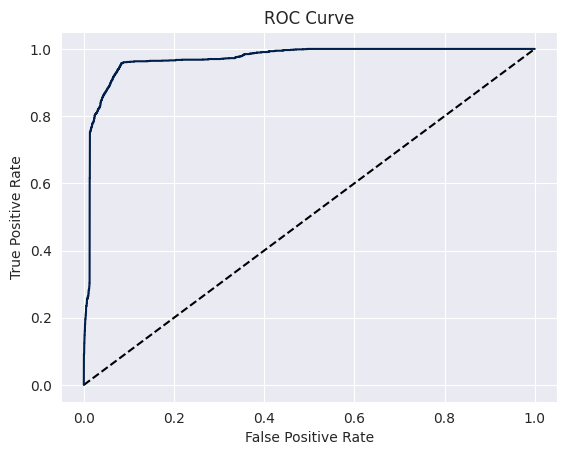

In [ ]:
predicted_y_train = nusvcc.predict(X_train)
score_generate_train(X_train, y_train, predicted_y_train,nusvcc)

accuracy  0.7494677075940384
precision_positive  0.525
precision_negative  0.8384539147670962
recall_sensitivity  0.5630026809651475
recall_specificity  0.8166023166023166
f1_positive score  0.5433376455368694
f1_negative score  0.8273838630806847
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1036
           1       0.53      0.56      0.54       373

    accuracy                           0.75      1409
   macro avg       0.68      0.69      0.69      1409
weighted avg       0.76      0.75      0.75      1409

hamming_loss  0.2505322924059617
log loss  0.5057470940849905
roc_auc_score for  NuSVC(nu=0.201523, probability=True, tol=1e-13)  :  0.7509445485316799


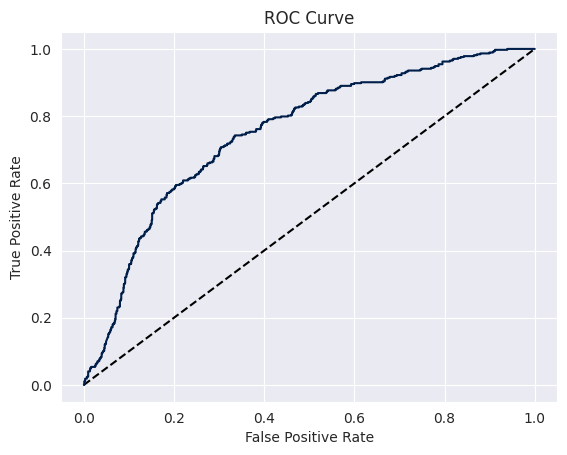

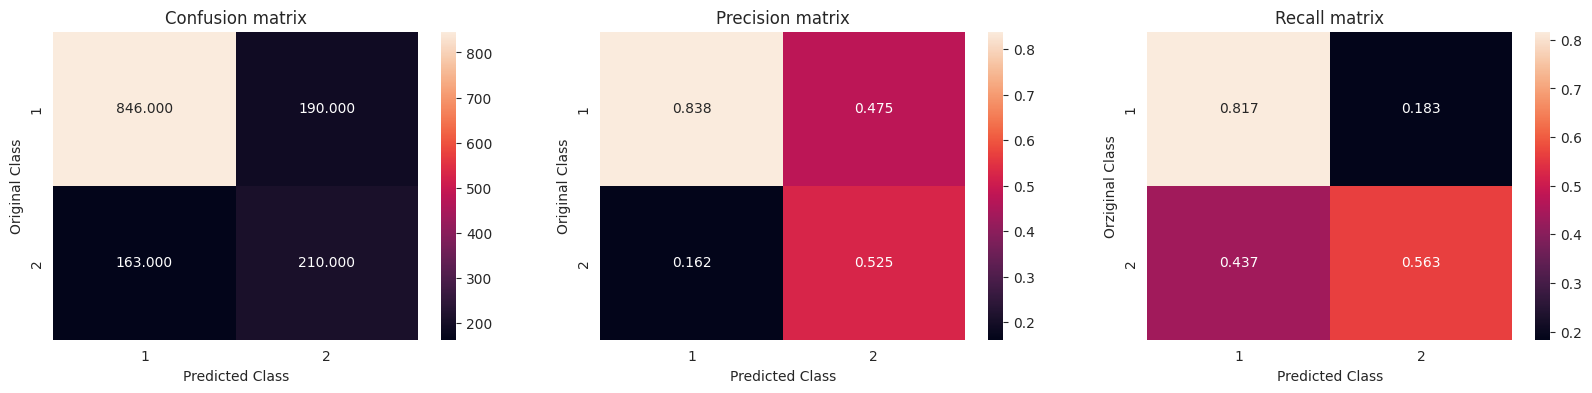

In [ ]:
score_generate(X_test,y_test, y_prednusvc,nusvcc)
plot_confusion_matrix(y_test, y_prednusvc)

In [ ]:
from sklearn.svm import NuSVC
clf=NuSVC(nu=.2015230,kernel='rbf',gamma='scale',tol =1e-13)

In [ ]:
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.7494677075940384

#KNeighbors Classifier -

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn=KNeighborsClassifier()

In [ ]:
param_grid={'n_neighbors':[1,4,5,7,10,12,50,100,500,300,200,30,40,70,1000], 'weights':['uniform', 'distance']}

In [ ]:
rcv_knn=RandomizedSearchCV(knn,param_grid,cv=15)
rcv_knn.fit(X_train, y_train)

RandomizedSearchCV(cv=15, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 4, 5, 7, 10, 12, 50,
                                                        100, 500, 300, 200, 30,
                                                        40, 70, 1000],
                                        'weights': ['uniform', 'distance']})

In [ ]:
y_pred_knn=rcv_knn.predict(X_test)


accuracy  0.8049343272985445
precision_positive  0.6586730615507594
precision_negative  0.8466803559206023
recall_sensitivity  0.5508021390374331
recall_specificity  0.8968100531657806
f1_positive score  0.5999271933017838
f1_negative score  0.8710245276376012
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4138
           1       0.66      0.55      0.60      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.74      5634
weighted avg       0.80      0.80      0.80      5634

hamming_loss  0.19506567270145544
log loss  0.41237175890700106
roc_auc_score for  RandomizedSearchCV(cv=15, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 4, 5, 7, 10, 12, 50,
                                                        100, 500, 300, 200, 30,
                                                        40, 70, 1000],
                                      

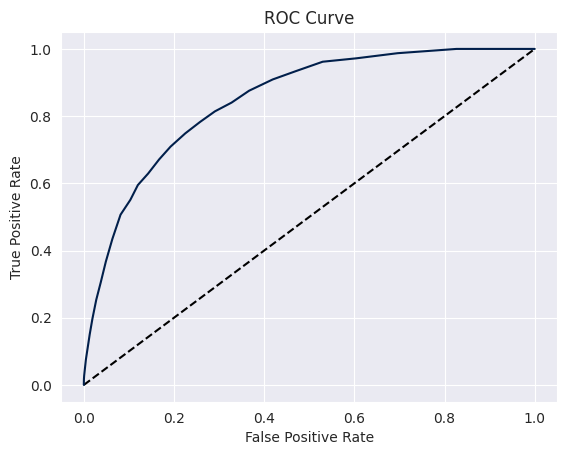

In [ ]:
predicted_y_train = rcv_knn.predict(X_train)
score_generate_train(X_train, y_train, predicted_y_train,rcv_knn)

accuracy  0.7998580553584103
precision_positive  0.645367412140575
precision_negative  0.843978102189781
recall_sensitivity  0.5415549597855228
recall_specificity  0.8928571428571429
f1_positive score  0.5889212827988338
f1_negative score  0.8677298311444654
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.65      0.54      0.59       373

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

hamming_loss  0.20014194464158977
log loss  0.4623575040670696
roc_auc_score for  RandomizedSearchCV(cv=15, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 4, 5, 7, 10, 12, 50,
                                                        100, 500, 300, 200, 30,
                                                        40, 70, 1000],
                                        '

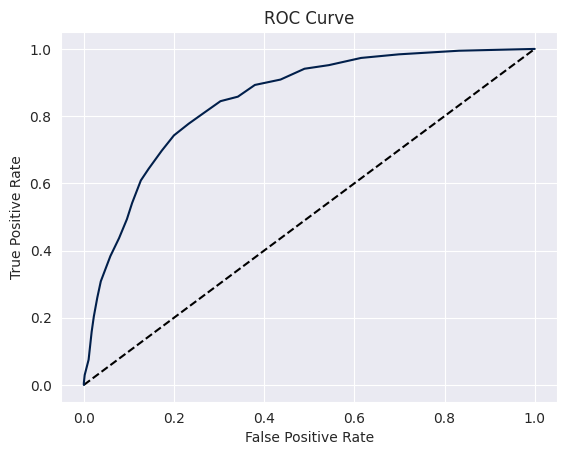

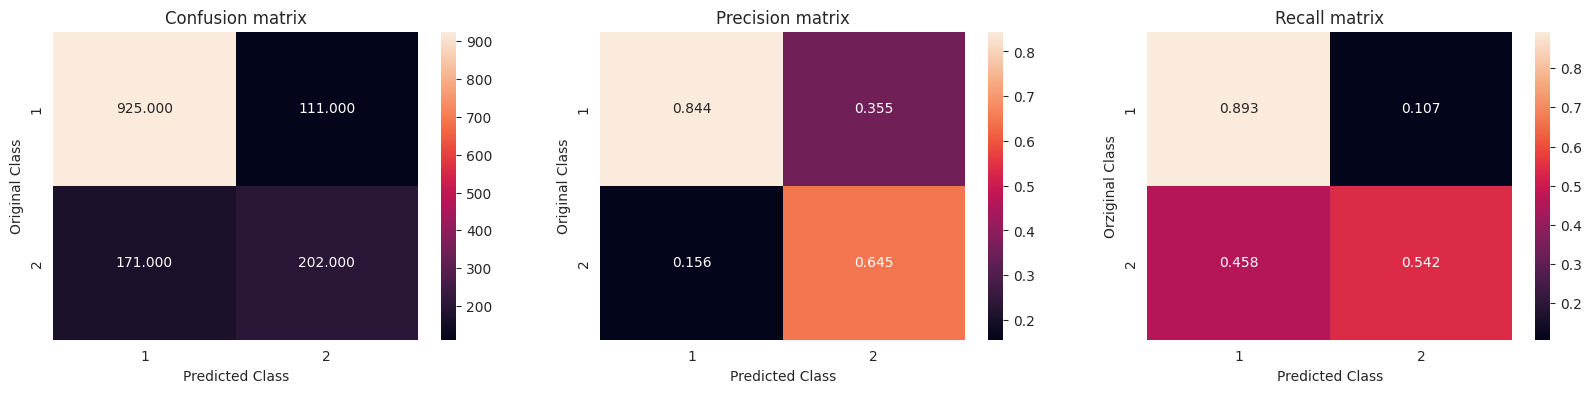

In [ ]:
score_generate(X_test,y_test, y_pred_knn,rcv_knn)
plot_confusion_matrix(y_test, y_pred_knn)

In [ ]:
print(f'\nBest Parameter: {rcv_knn.best_params_}\n')


Best Parameter: {'weights': 'uniform', 'n_neighbors': 30}



crosscheck

In [ ]:
model_knn = KNeighborsClassifier(weights = 'distance', n_neighbors = 100)

model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100, weights='distance')

In [ ]:
model_knn.score(X_test,y_test)

0.8034066713981547

#feature importance

In [ ]:
X.shape

(7043, 16)

In [ ]:
Y.shape

(7043,)

In [ ]:
x_new=X

In [ ]:
y_new=y

In [ ]:
X

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,0.013889,1,0,1,0,0,0,0,0.00000,1,0,0.115423,0.001275
1,0,0,0,0.472222,1,1,0,1,0,0,0,1.00000,0,1,0.385075,0.215867
2,0,0,0,0.027778,1,1,1,0,0,0,0,0.00000,1,1,0.354229,0.010310
3,0,0,0,0.625000,1,1,0,1,1,0,0,1.00000,0,2,0.239303,0.210241
4,0,0,0,0.027778,2,0,0,0,0,0,0,0.00000,1,0,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0.333333,1,1,0,1,1,1,1,1.00000,1,1,0.662189,0.227521
7039,0,1,1,1.000000,2,0,1,1,0,1,1,1.00000,1,3,0.845274,0.847461
7040,0,1,1,0.152778,1,1,0,0,0,0,0,0.00000,1,0,0.112935,0.037809
7041,1,1,0,0.055556,2,0,0,0,0,0,0,0.00000,1,1,0.558706,0.033210


###xgb feature importance

In [ ]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


In [ ]:
xgb2.fit(X, Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

In [ ]:
xgb2.score(X, Y)

0.8889677694164418

In [ ]:
#X_train = pd.DataFrame(X_train)

In [ ]:
X.shape

(7043, 16)

In [ ]:
X.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,0.013889,1,0,1,0,0,0,0,0.0,1,0,0.115423,0.001275
1,0,0,0,0.472222,1,1,0,1,0,0,0,1.0,0,1,0.385075,0.215867
2,0,0,0,0.027778,1,1,1,0,0,0,0,0.0,1,1,0.354229,0.010310
3,0,0,0,0.625000,1,1,0,1,1,0,0,1.0,0,2,0.239303,0.210241
4,0,0,0,0.027778,2,0,0,0,0,0,0,0.0,1,0,0.521891,0.015330


In [ ]:
top_from_xgb = pd.Series(xgb2.feature_importances_, index = X.columns)
top_from_xgb_5 = top_from_xgb.nlargest(5)

In [ ]:
top_from_xgb_5

Contract           0.276022
InternetService    0.152712
OnlineSecurity     0.097846
TechSupport        0.087042
tenure             0.041192
dtype: float32

###adaboost feature importance

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model = AdaBoostClassifier(n_estimators=100, random_state=1)
model.fit(X,Y)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [ ]:
top_from_ada = pd.Series(model.feature_importances_, index = X.columns)
top_from_ada_5 = top_from_ada.nlargest(5)

print(top_from_ada_5)







TotalCharges       0.40
MonthlyCharges     0.26
tenure             0.14
Contract           0.04
InternetService    0.03
dtype: float64


###svc feature importance

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [ ]:
svc = SVC(kernel = 'linear', C = 0.001, random_state=0,gamma='auto', probability=True) #'linear', 'poly', 'rbf', 'sigmoid'

svc.fit(X,Y)
svc.score(X, Y)

0.7346301292063041

In [ ]:
top_from_svc_5 = pd.Series(abs(svc.coef_[0]), index=X.columns).nlargest(5)



In [ ]:
top_from_svc_5

tenure             0.157651
TotalCharges       0.115496
InternetService    0.105491
Contract           0.071458
StreamingTV        0.049406
dtype: float64

##catboost feature importance

In [ ]:
!pip install catboost

In [ ]:
import catboost as ctb

In [ ]:
model_CBC = ctb.CatBoostClassifier()
model_CBC.fit(X, Y)
#class_weight={0:0.6,1:0.3}
#print(model_CBC)

Learning rate set to 0.02371
0:	learn: 0.6761227	total: 4.87ms	remaining: 4.87s
1:	learn: 0.6615350	total: 11.5ms	remaining: 5.75s
2:	learn: 0.6465025	total: 17.2ms	remaining: 5.7s
3:	learn: 0.6320727	total: 26ms	remaining: 6.47s
4:	learn: 0.6188025	total: 32.9ms	remaining: 6.54s
5:	learn: 0.6069026	total: 36.2ms	remaining: 6s
6:	learn: 0.5956022	total: 39.8ms	remaining: 5.64s
7:	learn: 0.5844581	total: 43.1ms	remaining: 5.34s
8:	learn: 0.5746417	total: 46.5ms	remaining: 5.12s
9:	learn: 0.5652136	total: 49.6ms	remaining: 4.91s
10:	learn: 0.5564862	total: 53.1ms	remaining: 4.78s
11:	learn: 0.5483227	total: 56.4ms	remaining: 4.64s
12:	learn: 0.5415958	total: 60ms	remaining: 4.56s
13:	learn: 0.5345288	total: 66.9ms	remaining: 4.71s
14:	learn: 0.5279132	total: 70.2ms	remaining: 4.61s
15:	learn: 0.5221543	total: 73.4ms	remaining: 4.51s
16:	learn: 0.5161385	total: 76.7ms	remaining: 4.43s
17:	learn: 0.5110074	total: 80ms	remaining: 4.36s
18:	learn: 0.5055744	total: 83.1ms	remaining: 4.29s
19:

In [ ]:
model_CBC.score(X, Y)

0.8621326139429221

In [ ]:
top_from_cbc = pd.Series(model_CBC.feature_importances_, index = X_train.columns)
top_from_cbc_5 = top_from_cbc.nlargest(5)

print(top_from_cbc_5)


TotalCharges      16.422252
tenure            15.495510
MonthlyCharges    15.225783
Contract          12.035302
PaymentMethod      7.142857
dtype: float64


##logit

In [ ]:
logistic_model = LogisticRegression(solver = 'newton-cg', penalty = 'l2', max_iter = 100, C = 5, random_state = 42)

logistic_model.fit(X, Y)

logistic_model.score(X, Y)

0.8037767996592361

In [ ]:
top_from_logistic_model_5 = pd.Series(abs(logistic_model.coef_[0]), index=X.columns).nlargest(5)

print(top_from_logistic_model_5)



tenure             3.933030
TotalCharges       1.966598
MonthlyCharges     1.508893
InternetService    1.228197
Contract           0.580524
dtype: float64
